<a href="https://colab.research.google.com/github/inagib21/BuildingPermitAnalysis/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview
The objective of this project is to use data science skills to identify and predict trends in New York City building permits and classify pre-1940 buildings based on recent maintenance. The project is aimed at providing vital insights to our stakeholder, the MetroStar Real Estate Investment Firm, which will aid them in making informed decisions related to their real estate investments.

# Data Understanding:
For this project we will be using two datasets, [DOB NOW: Build – Approved Permits](https://data.cityofnewyork.us/Housing-Development/DOB-NOW-Build-Approved-Permits/rbx6-tga4) and [PLUTO](https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page), which offer comprehensive information on building permits and extensive land use details respectively.



Lets import some of the libraries that we will be using.

In [1]:
import plotly.express as px

In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!gdown --id 16dH6ZQFAmIOAK4CWXfhn60fUVoGSbVkz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16dH6ZQFAmIOAK4CWXfhn60fUVoGSbVkz
To: /content/ApprovedPermits.csv
100% 213M/213M [00:02<00:00, 92.7MB/s]


In [4]:
# Read CSV file into a DataFrame
df = pd.read_csv('ApprovedPermits.csv')

<ipython-input-4-f5cea7a8267f>:2: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ApprovedPermits.csv')


In [5]:
df.head()

Job Filing Number   Filing Reason House No       Street Name    Borough  \
0      M00671065-I1  Initial Permit       65  WEST   55 STREET  MANHATTAN   
1      B00768943-S5  Initial Permit       27       ARION PLACE   BROOKLYN   
2      Q00453643-I1  Initial Permit   100-15        194 STREET     QUEENS   
3      M08039802-I1  Initial Permit       10    DOWNING STREET  MANHATTAN   
4      M00674105-I1  Initial Permit      120       WALL STREET  MANHATTAN   

    LOT      Bin  Block  C B NO Apt/Condo No(s)  ...             Issued Date  \
0   7.0  1034818   1271   105.0             NaN  ...  02/02/2022 12:00:00 AM   
1  40.0  3326076   3136   304.0             NaN  ...  02/13/2023 12:00:00 AM   
2  22.0  4232167  10861   412.0             NaN  ...  07/13/2021 12:00:00 AM   
3  27.0  1008350    527   102.0             NaN  ...  02/07/2023 12:00:00 AM   
4   1.0  1000871     37   101.0             NaN  ...  02/14/2022 12:00:00 AM   

             Expired Date                                    Job Description  \
0  02/02/2023 05:00:00 AM  Installation of temporary sidewalk shed per pl...   
1  11/04/2023 11:00:00 PM  Fence application filed subsequent to Alt-CO, ...   
2  07/13/2022 04:00:00 AM  PROPOSED VERTICAL AND HORIZONTAL ENLARGEMENT, ...   
3  06/01/2023 12:00:00 AM  Removal of interior finishes and renovation of...   
4  04/01/2022 12:00:00 AM  Application filed to show AC unit specificatio...   

   Estimated Job Costs             Owner Business Name    Owner Name  \
0                  1.0            65 WEST PROPERTY LLC    DEAN PALIN   
1               1000.0  WATERFRONT PROPERTY MANAGEMENT  MOSES KARPEN   
2             408900.0                             NaN  LESTER HANNA   
3             200000.0       STONEHENGE MANAGEMENT LLC  ADAM GRUSHKO   
4               1000.0     SILVERSTEIN PROPERTIES INC.  BILL DACUNTO   

  Owner Street Address Owner City Owner State Owner Zip Code  
0                  NaN        NaN         NaN            NaN  
1                  NaN        NaN         NaN            NaN  
2                  NaN        NaN         NaN            NaN  
3                  NaN        NaN         NaN            NaN  
4                  NaN        NaN         NaN            NaN  

[5 rows x 35 columns]

In [6]:
#inspecting Dimensions
df.shape

(445019, 35)

In [7]:
#checking column info aswell as missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445019 entries, 0 to 445018
Data columns (total 35 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Job Filing Number                     445019 non-null  object 
 1   Filing Reason                         445019 non-null  object 
 2   House No                              445019 non-null  object 
 3   Street Name                           445019 non-null  object 
 4   Borough                               445019 non-null  object 
 5   LOT                                   444877 non-null  float64
 6   Bin                                   445019 non-null  int64  
 7   Block                                 445019 non-null  int64  
 8   C B NO                                444759 non-null  float64
 9   Apt/Condo No(s)                       1710 non-null    object 
 10  Work on Floor                         443100 non-null  object 
 11  

it seems that some of the columns in the DataFrame have no non-null values, which means that they contain no useful information for analysis. Here are the columns that have no non-null values:

Owner Street Address
Owner City
Owner State
Owner Zip Code
Filing Representative Middle Initial

 ### Cleaning [DOB](https://data.cityofnewyork.us/Housing-Development/DOB-NOW-Build-Approved-Permits/rbx6-tga4) dataset.

In [8]:
#Dropping columns with no values
df = df.drop(['Owner Street Address', 'Owner City', 'Owner State', 'Owner Zip Code', 'Filing Representative Middle Initial'], axis=1)


In [9]:
#Dropping columns with very small amount of values
df = df.drop(['Apt/Condo No(s)','Applicant Middle Name'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445019 entries, 0 to 445018
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Job Filing Number                    445019 non-null  object 
 1   Filing Reason                        445019 non-null  object 
 2   House No                             445019 non-null  object 
 3   Street Name                          445019 non-null  object 
 4   Borough                              445019 non-null  object 
 5   LOT                                  444877 non-null  float64
 6   Bin                                  445019 non-null  int64  
 7   Block                                445019 non-null  int64  
 8   C B NO                               444759 non-null  float64
 9   Work on Floor                        443100 non-null  object 
 10  Work Type                            445019 non-null  object 
 11  Permittee's L

Lets continue dropping the columns which are irrelevant to our analysis

In [11]:
columns_to_drop = ['House No', 'Permittee\'s License Type', 'Applicant License #', 'Applicant First Name', 
                   'Applicant Last Name', 'Filing Representative First Name', 'Filing Representative Last Name',
                   'Applicant Business Address', 'Issued Date', 'Expired Date', 'Work Permit',
                   'Filing Representative Business Name','Owner Business Name','Owner Name','Applicant Business Name','Bin']

df = df.drop(columns=columns_to_drop)

In [12]:
# Check for NaN values
print(df.isnull().sum())

Job Filing Number         0
Filing Reason             0
Street Name               0
Borough                   0
LOT                     142
Block                     0
C B NO                  260
Work on Floor          1919
Work Type                 0
Approved Date            30
Job Description           1
Estimated Job Costs       1
dtype: int64


In [13]:
#Now we can drop any rows with missiing values
df = df.dropna()

In [14]:
df.shape

(442667, 12)

In [15]:
# Now we make sure columns are correct df type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442667 entries, 0 to 445018
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Job Filing Number    442667 non-null  object 
 1   Filing Reason        442667 non-null  object 
 2   Street Name          442667 non-null  object 
 3   Borough              442667 non-null  object 
 4   LOT                  442667 non-null  float64
 5   Block                442667 non-null  int64  
 6   C B NO               442667 non-null  float64
 7   Work on Floor        442667 non-null  object 
 8   Work Type            442667 non-null  object 
 9   Approved Date        442667 non-null  object 
 10  Job Description      442667 non-null  object 
 11  Estimated Job Costs  442667 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 43.9+ MB


In [16]:
# Convert date variables to datetime format
df['Approved Date'] = pd.to_datetime(df['Approved Date'])



In [17]:
# Extract features from date variables
df['Approved Year'] = df['Approved Date'].dt.year
df['Approved Month'] = df['Approved Date'].dt.month


In [18]:

# create correlation matrix
corr = df.corr()

fig = px.imshow(df.corr(), color_continuous_scale='RdBu', title='Correlation Heatmap')
fig.update_layout(template='plotly_dark', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                font=dict(color='black'))
fig.show()


<ipython-input-18-a0e7b0edeef7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-18-a0e7b0edeef7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr(), color_continuous_scale='RdBu', title='Correlation Heatmap')


In [19]:
print(df['C B NO'].nunique())

71


In [20]:
# Now Lets convert our object columns that should be numbers
df['C B NO'] = pd.to_numeric(df['C B NO'], errors='coerce')



In [21]:
# Check for NaN values
print(df.isnull().sum())

Job Filing Number      0
Filing Reason          0
Street Name            0
Borough                0
LOT                    0
Block                  0
C B NO                 0
Work on Floor          0
Work Type              0
Approved Date          0
Job Description        0
Estimated Job Costs    0
Approved Year          0
Approved Month         0
dtype: int64


In [22]:
# We dont need this column
df = df.drop('Job Filing Number', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442667 entries, 0 to 445018
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Filing Reason        442667 non-null  object        
 1   Street Name          442667 non-null  object        
 2   Borough              442667 non-null  object        
 3   LOT                  442667 non-null  float64       
 4   Block                442667 non-null  int64         
 5   C B NO               442667 non-null  float64       
 6   Work on Floor        442667 non-null  object        
 7   Work Type            442667 non-null  object        
 8   Approved Date        442667 non-null  datetime64[ns]
 9   Job Description      442667 non-null  object        
 10  Estimated Job Costs  442667 non-null  float64       
 11  Approved Year        442667 non-null  int64         
 12  Approved Month       442667 non-null  int64         
dtypes: datetime64[

In [24]:
unique_work_types = df['Work Type'].unique()
print(unique_work_types)


['Sidewalk Shed' 'Construction Fence' 'Foundation' 'General Construction'
 'Mechanical Systems' 'Earth Work' 'Protection and Mechanical Methods'
 'Supported Scaffold' 'Sign' 'Plumbing' 'Sprinklers' 'Boiler Equipment'
 'Antenna' 'Structural' 'Support of Excavation' 'Curb Cut' 'Standpipe']


In [25]:
relevant_work_types = [
    "Foundation",
    "Mechanical Systems",
    "Earth Work",
    "Structural",
    "Support of Excavation",
]

filtered_df = df[df["Work Type"].isin(relevant_work_types)]

In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74632 entries, 2 to 445011
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Filing Reason        74632 non-null  object        
 1   Street Name          74632 non-null  object        
 2   Borough              74632 non-null  object        
 3   LOT                  74632 non-null  float64       
 4   Block                74632 non-null  int64         
 5   C B NO               74632 non-null  float64       
 6   Work on Floor        74632 non-null  object        
 7   Work Type            74632 non-null  object        
 8   Approved Date        74632 non-null  datetime64[ns]
 9   Job Description      74632 non-null  object        
 10  Estimated Job Costs  74632 non-null  float64       
 11  Approved Year        74632 non-null  int64         
 12  Approved Month       74632 non-null  int64         
dtypes: datetime64[ns](1), float64(

### [PLUTO](https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page) Data Cleaning

Mounting to Drive to get dataset



In [27]:
!gdown --id 1NBwjfiuO82CZvfH0TZ5FJFUO5UTBdWUb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NBwjfiuO82CZvfH0TZ5FJFUO5UTBdWUb
To: /content/pluto.csv
100% 386M/386M [00:03<00:00, 129MB/s]


In [28]:
# Read CSV file into a DataFrame
pluto_df = pd.read_csv('pluto.csv')

<ipython-input-28-556f9318be30>:2: DtypeWarning:

Columns (21,22,24,26,66) have mixed types. Specify dtype option on import or set low_memory=False.



In [29]:
pluto_df.head()

borough  block  lot     cd    bct2020     bctcb2020  ct2010  cb2010  \
0      BX   2286   24  201.0  2004100.0  2.004100e+10    41.0  2002.0   
1      BX   2286  103  201.0  2004100.0  2.004100e+10    41.0  2002.0   
2      MN   1249  146  107.0  1017500.0  1.017500e+10   175.0  2000.0   
3      MN   1249  149  107.0  1017500.0  1.017500e+10   175.0  2000.0   
4      BX   2737   20  202.0  2009301.0  2.009302e+10    93.0  1005.0   

   schooldist  council  ...  appbbl appdate  plutomapid  firm07_flag  \
0         7.0      8.0  ...     NaN     NaN           1          NaN   
1         7.0      8.0  ...     NaN     NaN           1          NaN   
2         3.0      6.0  ...     NaN     NaN           1          NaN   
3         3.0      6.0  ...     NaN     NaN           1          NaN   
4         8.0     17.0  ...     NaN     NaN           1          NaN   

   pfirm15_flag  version  dcpedited   latitude  longitude notes  
0           NaN     23v1        NaN  40.811035 -73.920172   NaN  
1           NaN     23v1        NaN  40.810700 -73.920132   NaN  
2           NaN     23v1          t  40.790541 -73.978310   NaN  
3           NaN     23v1          t  40.790642 -73.978556   NaN  
4           NaN     23v1        NaN  40.815670 -73.892287   NaN  

[5 rows x 92 columns]

In [30]:
pluto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859068 entries, 0 to 859067
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859068 non-null  object 
 1   block                 859068 non-null  int64  
 2   lot                   859068 non-null  int64  
 3   cd                    857650 non-null  float64
 4   bct2020               857576 non-null  float64
 5   bctcb2020             857576 non-null  float64
 6   ct2010                857576 non-null  float64
 7   cb2010                857576 non-null  float64
 8   schooldist            856921 non-null  float64
 9   council               857509 non-null  float64
 10  zipcode               856905 non-null  float64
 11  firecomp              856902 non-null  object 
 12  policeprct            856916 non-null  float64
 13  healthcenterdistrict  856916 non-null  float64
 14  healtharea            856916 non-null  float64
 15  

In [31]:
# Mapping full names to abbreviations
borough_mapping = {
    'MN':'MANHATTAN',
    'BK':'BROOKLYN',
    'BX':'BRONX',
    'QN':'QUEENS',
    'SI':'STATEN ISLAND'
}

In [32]:
# Select the required columns
pluto_columns = ['Borough', 'Block', 'LOT', 'latitude', 'longitude', 
                 'bldgclass', 'landuse', 'yearbuilt', 'numfloors',
                 'unitsres', 'unitstotal', 'builtfar', 'residfar', 
                 'commfar', 'facilfar', 'zipcode', 'ownername']

# Rename columns in Pluto dataset
pluto_df_renamed = pluto_df.rename(columns={'borough': 'Borough', 'block': 'Block', 'lot': 'LOT'})

# Convert 'Borough' values in Pluto dataset to abbreviations
pluto_df_renamed['Borough'] = pluto_df_renamed['Borough'].map(borough_mapping)

# Merge the dataframes
merged_df = filtered_df.merge(pluto_df_renamed[pluto_columns], on=['Borough', 'Block', 'LOT'], how='left')


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74632 entries, 0 to 74631
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Filing Reason        74632 non-null  object        
 1   Street Name          74632 non-null  object        
 2   Borough              74632 non-null  object        
 3   LOT                  74632 non-null  float64       
 4   Block                74632 non-null  int64         
 5   C B NO               74632 non-null  float64       
 6   Work on Floor        74632 non-null  object        
 7   Work Type            74632 non-null  object        
 8   Approved Date        74632 non-null  datetime64[ns]
 9   Job Description      74632 non-null  object        
 10  Estimated Job Costs  74632 non-null  float64       
 11  Approved Year        74632 non-null  int64         
 12  Approved Month       74632 non-null  int64         
 13  latitude             72988 non-

# Exploritory Data Analysis:


In [34]:
#Resetting our index
filtered_df.set_index('Approved Date', inplace=True)
filtered_df.sort_index(inplace=True)

<ipython-input-34-57163a306e47>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
# Group by 'Borough', 'C B NO', and 'Approved Date', then resample by month
monthly_permits = filtered_df.groupby(['Borough', 'C B NO', pd.Grouper(freq='M')]).size().unstack().fillna(0)

# Find the community board with the least growth in permits over time in each borough
borough_cb_slow = monthly_permits.diff().sum(axis=1).groupby('Borough').idxmin()

# Print the results
for borough, (b, cb) in borough_cb_slow.items():
    print(f"The community board with the least growth in building permits in {borough} is: {cb}")


The community board with the least growth in building permits in BRONX is: 227.0
The community board with the least growth in building permits in BROOKLYN is: 307.0
The community board with the least growth in building permits in MANHATTAN is: 106.0
The community board with the least growth in building permits in QUEENS is: 408.0
The community board with the least growth in building permits in STATEN ISLAND is: 502.0


In [36]:
# Create a list to store the filtered data for each borough
filtered_data_list = []
# Filter the merged_df for each borough and the corresponding top community board
for borough, (b, cb) in borough_cb_slow.items():
    filtered_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb)]
    filtered_data_list.append(filtered_data)

# Concatenate the filtered data for all boroughs
filtered_data_combined = pd.concat(filtered_data_list)

# Create a choropleth map
fig = px.scatter_mapbox(filtered_data_combined, lat='latitude', lon='longitude', color='Borough', hover_data=['C B NO'],
                        mapbox_style='carto-positron', zoom=9)

fig.update_layout(title_text='Community Boards With Least Growth', title_x=0.5, mapbox_style="open-street-map")

fig.show()

In [37]:
# Group by 'Borough', 'C B NO', and 'Approved Date', then resample by month
monthly_permits = filtered_df.groupby(['Borough', 'C B NO', pd.Grouper(freq='M')]).size().unstack().fillna(0)

# Find the community board with the most growth in permits over time in each borough
borough_cb_growth = monthly_permits.diff().sum(axis=1).groupby('Borough').idxmax()

# Print the results
for borough, (b, cb) in borough_cb_growth.items():
    print(f"The community board with the most growth in building permits in {borough} is: {cb}")


The community board with the most growth in building permits in BRONX is: 204.0
The community board with the most growth in building permits in BROOKLYN is: 301.0
The community board with the most growth in building permits in MANHATTAN is: 105.0
The community board with the most growth in building permits in QUEENS is: 407.0
The community board with the most growth in building permits in STATEN ISLAND is: 501.0


In [38]:
# Create a list to store the filtered data for each borough
filtered_data_list = []
# Filter the merged_df for each borough and the corresponding top community board
for borough, (b, cb) in borough_cb_growth.items():
    filtered_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb)]
    filtered_data_list.append(filtered_data)

# Concatenate the filtered data for all boroughs
filtered_data_combined = pd.concat(filtered_data_list)

# Create a choropleth map
fig = px.scatter_mapbox(filtered_data_combined, lat='latitude', lon='longitude', color='Borough', hover_data=['C B NO'],
                        mapbox_style='carto-positron', zoom=9)

fig.update_layout(title_text='Community Boards With Highest Growth', title_x=0.5, mapbox_style="open-street-map")

fig.show()



Above, we can observe an interactive map displaying the community boards with the highest and lowest growth. It is noteworthy that in boroughs like Manhattan, Staten Island, Brooklyn, and Queens, the community boards with the highest growth and slowest growth are in close proximity to each other. This spatial pattern raises interesting insights into the distribution of growth across different community boards within these boroughs.

In [39]:
# Aggregate the data
grouped_data = filtered_df['Borough'].value_counts().reset_index(name='Count')
grouped_data.columns = ['Borough', 'Count']

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Borough', y='Count', title='Permits Approveed by Borough')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In the plot displaying the number of permits issued by borough, we can observe the following distribution:

1. Manhattan: Manhattan has the highest number of permits issued, with approximately 30,000 permits. This indicates a significant level of construction and development activities in Manhattan.

2. Brooklyn: Brooklyn follows Manhattan with around 18,000 permits issued. This suggests a substantial amount of construction and renovation projects taking place in Brooklyn.

3. Queens: Queens is the third highest in terms of permits issued, with approximately 15,000 permits. This indicates a significant level of construction and development activities in Queens as well.

4. Bronx and Staten Island: The Bronx and Staten Island have a lower number of permits issued compared to Manhattan, Brooklyn, and Queens, with approximately 5,000 permits each. This suggests less construction activities in these boroughs.

The plot highlights the variation in the number of permits issued across different boroughs, with Manhattan leading the way followed by Brooklyn, Queens, the Bronx, and Staten Island.

In [40]:
# Aggregate the data
grouped_data = filtered_df.groupby('Work Type')['Estimated Job Costs'].mean().reset_index(name='Average Estimated Job Costs')
 
 # Sort the data in descending order
grouped_data = grouped_data.sort_values(by='Average Estimated Job Costs', ascending=False)

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Average Estimated Job Costs', title='Average Estimated Job Costs by Work Type')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()



In [41]:

boroughs = filtered_df['Borough'].unique()

for borough in boroughs:
    # Filter the data for the current borough
    borough_data = filtered_df[filtered_df['Borough'] == borough]
    
    # Aggregate the data and calculate average estimated job costs
    grouped_data = borough_data.groupby('Work Type')['Estimated Job Costs'].mean().reset_index(name='Average Estimated Job Costs')
    
    # Sort the data in descending order
    grouped_data = grouped_data.sort_values(by='Average Estimated Job Costs', ascending=False)

    # Create the bar chart using Plotly Express
    fig = px.bar(grouped_data, x='Work Type', y='Average Estimated Job Costs', 
                 title=f'Average Estimated Job Costs by Work Type in {borough}')

    # Customize the chart layout
    fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='black'),
        xaxis=dict(showgrid=True, gridcolor='black'),
        yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()

In [42]:
# Aggregate the data
grouped_data = filtered_df.groupby('Work Type')['Estimated Job Costs'].sum().reset_index(name='Total Estimated Job Costs')

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Total Estimated Job Costs', title='Total Estimated Job Costs by Work Type')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


The total estimated job cost by work type shows the following:

1. Mechanical Systems: The work type with the highest value, approximately 12 billion.
2. Structural: The second-highest work type with close to 7 billion.
3. Foundation: Close to 3 billion.
4. Earthwork and Support of Excavation: Around 1 billion.

These values indicate the estimated job costs associated with each work type, with mechanical systems having the highest cost followed by structural, foundation, and earthwork/support of excavation.

In [43]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Approved Year', 'Approved Month']).size().reset_index(name='Count')

# Create a new column for year-month combination
grouped_data['Year-Month'] = grouped_data['Approved Year'].astype(str) + '-' + grouped_data['Approved Month'].astype(str)

# Create the line chart using Plotly Express
fig = px.line(grouped_data, x='Year-Month', y='Count', title='Total Permits Issued by Month and Year')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In the plot displaying the total permits issued by month and year, we can observe the following patterns:

1. Overall Upward Trend: From July 2019 to May 2022, there was a consistent upward trend in the number of approved permits. This indicates an overall increase in construction activities and building permits issued during this period.

2. Sudden Drop: However, right after May 2022, there is a noticeable and significant drop in the number of approved permits. This decline suggests a sudden decrease in construction activities or a potential change in the permitting process.

The plot showcases the upward trend in approved permits followed by a sharp decline, highlighting the dynamic nature of building permit issuance over time.

In [44]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Approved Year', 'Approved Month', 'Work Type']).size().reset_index(name='Count')

# Create a new column for year-month combination
grouped_data['Year-Month'] = grouped_data['Approved Year'].astype(str) + '-' + grouped_data['Approved Month'].astype(str)

# Create the line chart using Plotly Express
fig = px.line(grouped_data, x='Year-Month', y='Count', color='Work Type', title='Permits Issued by Work Type and Month-Year')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In the plot showing permits issued by work type and month-year, we can observe the following trends:

1. Recent Trend: There has been a significant slowdown in the number of permits that have been approved. This indicates a decrease in construction activities or a potential slowdown in the building permits process.

2. Most Approved Permits: The work type with the highest number of approved permits is Mechanical Systems. It is followed by Structural and Foundation work types. These three work types have consistently received the highest number of permits.

Overall, the plot suggests a recent decline in the number of approved permits, with Mechanical Systems, Structural, and Foundation work types being the most prominent in terms of the number of permits issued.

In [45]:

# Create separate plots for each borough
for borough in boroughs:
    # Filter the data to only include the relevant borough
    borough_data = filtered_df[filtered_df['Borough'] == borough]

    # Group the data by Approved Year and C B NO and count the number of permits for each group
    cb_data = borough_data.groupby(['Approved Year', 'C B NO']).size().reset_index(name='Count')

    # Create the line chart using Plotly Express
    fig = px.line(cb_data, x=['Approved Year', 'C B NO'], y='Count', color='C B NO', title=f'Permits Issued by Community Board and Year in {borough}',
                  )

    # Customize the chart layout
    fig.update_layout(xaxis_title='Year', yaxis_title='Permits Issued', legend_title='Community Board',
                      title_font_color='black', font_color='black', 
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      xaxis=dict(showgrid=True, gridcolor='black'),
        yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()



In [46]:
# Create separate plots for each borough
for borough in boroughs:
    # Filter the data to only include the relevant borough
    borough_data = merged_df[merged_df['Borough'] == borough]

    # Group the data by 'bldgclass' and count the number of instances
    class_data = borough_data.groupby('bldgclass').size().reset_index(name='Count')

    # Sort the data by count in descending order and select the top 5
    class_data = class_data.sort_values(by='Count', ascending=False).head(5)

    # Create the bar chart using Plotly Express
    fig = px.bar(class_data, x='bldgclass', y='Count', title=f'Top 5 Building Class Distribution in {borough}',
                  )

    # Customize the chart layout
    fig.update_layout(xaxis_title='Building Class', yaxis_title='Count',
                      title_font_color='black', font_color='black', 
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      xaxis=dict(showgrid=True, gridcolor='black'),
                      yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()


In [47]:

# Define the top community boards in each borough
top_cb = {'BRONX': 204.0, 'BROOKLYN': 301.0, 'MANHATTAN': 105.0, 'QUEENS': 407.0, 'STATEN ISLAND': 501.0}

# Create separate plots for each borough
for borough, cb_no in top_cb.items():
    # Filter the data to only include the relevant borough and community board
    cb_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb_no)]

    # Group the data by 'bldgclass' and count the number of instances
    class_data = cb_data.groupby('bldgclass').size().reset_index(name='Count')

    # Sort the data by count in descending order and select the top 5
    class_data = class_data.sort_values(by='Count', ascending=False).head(5)

    # Create the bar chart using Plotly Express
    fig = px.bar(class_data, x='bldgclass', y='Count', title=f'Top 5 Building Class Distribution in {borough} Community Board {int(cb_no)}',
                  )

    # Customize the chart layout
    fig.update_layout(xaxis_title='Building Class', yaxis_title='Count',
                      title_font_color='black', font_color='black', 
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      xaxis=dict(showgrid=True, gridcolor='black'),
                      yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()


Building Class Explanation: [Reference](https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html#K)  

For **Manhattan:**:
- **O4**: Office Building; 20 Stories or more

 The most common type of building is a high-rise office building, with 20 or more stories. This is not surprising, given Manhattan's status as a global business hub.

- **D4**: Elevator Apartments - Cooperative 

The second most common is an elevator apartment, specifically a cooperative. This suggests that there is a significant amount of shared residential property in Manhattan.

- **O6**: Office Building; 7-19 stories

Next are office buildings with 7 to 19 stories, further reinforcing Manhattan's commercial nature.

- **RM**: Residential Multiple Use (primarily residential with some commercial) **RC**: Residential Building with Commercial Unit

The fourth and fifth most common building types are residential properties with some commercial usage and residential buildings with commercial units. These mixed-use buildings are likely a result of Manhattan's high population density and the need to make the most out of limited space.

For **Brooklyn:**
- **C0**: Walk-up Apartment; Three Families
  
  The most common building type in Brooklyn is a three-family walk-up apartment. This is indicative of Brooklyn's residential nature.
- **B1**: Two-Family Brick Building

 Two-family brick buildings are the second most common type, further emphasizing the prevalence of smaller residential properties in this borough.
- **B3**: Two Family Converted from One Family 

 The third most common type, a two-family house converted from one family, suggests that property owners in Brooklyn are looking to maximize their space by accommodating more families.

- **V0**: Garage; Two Stories or Less (Commercial)

 The third most common type, a two-family house converted from one family, suggests that property owners in Brooklyn are looking to maximize their space by accommodating more families.

- **S2**: Walk-up Apartment; Over Six Families without Stores

 Rounding out the top five is the walk-up apartment with over six families without stores, adding to the borough's diverse residential options.

For **Bronx:**
- **C1**: Walk Up Apartments - Over Six Families without Stores

  The most common building type in the Bronx is a walk-up apartment with over six families without stores. This shows a significant presence of medium-sized residential buildings.

- **D1**: Elevator Apartment; Semi-fireproof (without Stores)
 
 **V0**: Elevator Apartment; Semi-fireproof with Stores

  Elevator apartments, both semi-fireproof with and without stores, are the next most common, suggesting a mix of residential and commercial properties.

- **K1**: One-Story Retail Building
  
  Fourth most common are one-story retail buildings, indicating a commercial presence in the Bronx.
- **D7**: Two-Family Brick Building

  Two-family brick buildings are also common, adding to the variety of residential options.

For **Queens:**
- **A1**: One-Family House; Two Stories Detached

  The most common building type is a detached, two-story, one-family house, indicating a prevalence of suburban-style living.

- **B3**: Two-Family House; Semi-Attached
  
  Semi-attached two-family houses are also common, again emphasizing the residential character of Queens.

- **A2**: Large Suburban Residence
  **K1**: One-Family House; One Story Permanent Living Quarter

  Large suburban residences and one-story permanent living quarters for one family are also common, suggesting a mix of larger and smaller single-family homes.

- **B2**: Two-Family Brick Building
  
  The presence of two-family brick buildings rounds out the top five, adding another type of residential property to the mix.


For **Staten Island:**
- **B2**: Two Family Frame (Wood)

  The most common building type is a two-family frame house, indicative of suburban living.

- **A1**: One-Family House; Two Stories Detached

  Detached two-story, one-family houses are also common, adding to the borough's suburban nature.

- **V0**: Garage or Gas Station; One Story

  One-story garages or gas stations suggest some commercial activity on Staten Island.

- **A5**: One Family - Attached or Semi-Detached

  One-family attached or semi-detached houses are also present, offering more options for family living.

- **K6**: Shopping Center with Multiple Stores (with or without Parking)

  Finally, the presence of shopping centers with multiple stores suggests a significant retail presence in Staten Island.

Please note, these interpretations are based on the building class information provided and are only as accurate as the dataset. The actual distribution may differ slightly.


Building Class Explanation: [Reference](https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html#K)  

here's a brief explanation of the top building classes in each borough according to the NYC building code definitions:

BRONX, Community Board 204:

D1: Elevator apartment; semi-fireproof (without stores)
C1: Walk-up apartment; over six families without stores
D7: Elevator apartment; semi-fireproof with stores
B1: Two-family brick building
K1: One-story retail building

BROOKLYN, Community Board 301:

C0: Walk-up apartment; three families 
B9: Two-family miscellaneous
RM: Residential multiple use (primarily residential with some commercial)
V1: Garage; two stories or less (commercial)
C1: Walk-up apartment; over six families without stores

MANHATTAN, Community Board 105:

O4: Office building; 20 Stories or more
O6: Office building; 7-19 stories
RC: Residential building with commercial units
RM: Residential multiple use (primarily residential with some commercial)
K4: Store Building; Predomanet retail with other uses.

QUEENS, Community Board 407:

A1: One-family house; two stories detached
B3: Two-family house; semi-attached
A3: Large Suburban Residence
A2: One-family house; one story permanent living quarter
B1: Two-family brick building

STATEN ISLAND, Community Board 501:

A1: One-family house; two stories detached
B2: Two-family house; detached
V0: Garage or gas station; one story
A5: One-family house; attached or semi-detached
K6: Shopping center with multiple stores (with or without parking)


## Location Recommendations:
**Location Recommendations:**
Based on building permit growth, we've identified top-performing community boards within each NYC borough. Here are compelling reasons to consider them for your next investment:

**Brooklyn (CB 301.0 - includes neighborhoods like Williamsburg):** Known for its diverse culture and creative energy, Brooklyn's rapid development signals a thriving real estate market. Top building types include walk-up apartments and two-family houses, catering to a vibrant mix of residents. Commercial garages also feature prominently, highlighting the need for commercial real estate infrastructure in this bustling borough.

**Bronx (CB 204.0 - includes neighborhoods like Highbridge, Concourse):** Offering affordable real estate options and excellent connectivity, the Bronx is an emerging market with untapped potential. With a high prevalence of apartment buildings, both with and without stores, there's a strong potential for residential and mixed-use buildings. Two-family brick buildings and one-story retail buildings are also common, further enhancing the appeal of this dynamic borough.

**Manhattan (CB 105.0 - includes neighborhoods like Times Square, Theater District):** At the heart of NYC, Manhattan provides prestigious real estate opportunities with potential for attractive returns. The popularity of office buildings and residential buildings with commercial units suggests a high demand for mixed-use properties. Big-box stores also feature, pointing to lucrative opportunities in the retail sector.

**Queens (CB 407.0 - includes neighborhoods like Flushing, Whitestone):** Renowned for its cultural diversity and dynamic economy, Queens presents a chance to cater to varied demographics in a growing market. One-family houses, both detached and semi-detached, and two-family semi-attached houses dominate, making this borough ideal for family-oriented residential developments. Brick buildings and garages or gas stations also feature, offering diverse investment opportunities.

**Staten Island (CB 501.0 - includes neighborhoods like St. George, Tompkinsville):** Offering suburban charm and scenic landscapes, Staten Island is perfect for family-oriented investments, with opportunities for waterfront properties. Detached one-family and two-family houses are popular, reinforcing the borough's appeal for families. One-story garages or gas stations and shopping centers also feature, indicating a need for commercial infrastructure.

Remember, these community boards can serve as focal points to explore surrounding neighborhoods for further opportunities. Thorough market research and consideration of individual investment goals and risk tolerance are essential before making any investment decisions.

# Lead list For Old Buildings


As a real estate developer or investor, having access to a curated list of potential leads for old buildings can provide valuable insights into investment opportunities. In this regard, the old_buildings_df DataFrame proves to be an invaluable resource. It encompasses key information such as the owner's name, community board, building age, and other pertinent details. Notably, all the buildings listed were constructed prior to 1940, offering a unique opportunity to explore historical properties with significant potential for redevelopment.



In [48]:
# Step 1: Identify zipcodes of top-performing community boards
top_cb_zipcodes = merged_df[merged_df['C B NO'].isin([301, 204, 105, 407, 501])]['zipcode'].unique()

# Step 2: Filter `pluto_df` to include only buildings in these zipcodes
filtered_pluto_df = pluto_df[pluto_df['zipcode'].isin(top_cb_zipcodes)]

# Step 3: Identify old buildings, e.g., buildings built before 1940
old_buildings_df = filtered_pluto_df[filtered_pluto_df['yearbuilt'] < 1940]


In [49]:
old_buildings_df.to_csv('old_buildings_leads.csv', index=False)

In [50]:
# First, find the most common 'C B NO' for each zip code in the merged_df DataFrame
most_common_cb = merged_df.groupby('zipcode')['C B NO'].agg(lambda x:x.value_counts().index[0]).reset_index()

# Convert this DataFrame to a dictionary
most_common_cb_dict = most_common_cb.set_index('zipcode')['C B NO'].to_dict()

# Then, map this dictionary to the 'zipcode' column in the pluto_df DataFrame
pluto_df['C B NO'] = pluto_df['zipcode'].map(most_common_cb_dict)




In [51]:
# Filter `pluto_df` to include only buildings in top-performing community boards
filtered_pluto_df = pluto_df[pluto_df['C B NO'].isin([301, 204, 105, 407, 501])]

# Drop NA values in the 'yearbuilt' column
filtered_pluto_df = filtered_pluto_df.dropna(subset=['yearbuilt'])

# Create a new column 'Decade' by binning the year built into decades
filtered_pluto_df['Decade'] = (10 * (filtered_pluto_df['yearbuilt'] // 10)).astype(int)

# Group by community board and Decade to see the distribution
decade_distribution = filtered_pluto_df.groupby(['C B NO', 'Decade']).size().reset_index(name='Count')




In [52]:


def plot_building_age_distribution(decade_distribution, cb=None, borough=None):
    if cb is not None:
        # Filter the dataframe for the specified community board
        df_cb = decade_distribution[decade_distribution['C B NO'] == cb]
        title = f'Building Age Distribution in Community Board {cb}'
    elif borough is not None:
        # Filter the dataframe for the specified borough
        df_cb = decade_distribution[decade_distribution['borough'] == borough]
        title = f'Building Age Distribution in {borough} Borough'
    else:
        raise ValueError('Please specify either the community board number (cb) or the borough name.')
    
    # Sort the 'Decade' column in ascending order
    df_cb['Decade'] = df_cb['Decade'].astype(int)
    df_cb = df_cb.sort_values('Decade')
    # Drop rows with 0 values in the 'Count' column
    df_cb = df_cb[(df_cb['Count'] != 0) & (df_cb['Decade'] > 0)]
    # Create the bar plot
    fig = px.bar(df_cb, x='Decade', y='Count', labels={'Decade':'Decade Built', 'Count':'Number of Buildings'},
                 title=title,
                 template='plotly_dark')
    # Set the background color to transparent and text color to black
    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        font_color='black'
    )
    # Show the plot
    fig.show()

In [53]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['BROOKLYN'])

<ipython-input-52-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['BRONX'])

<ipython-input-52-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['MANHATTAN'])

<ipython-input-52-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['QUEENS'])

<ipython-input-52-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['STATEN ISLAND'])

<ipython-input-52-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Old Building Mantainence Prediction


In [58]:
# Rename columns in old building dataset
old_buildings_df = old_buildings_df.rename(columns={'borough': 'Borough', 'block': 'Block', 'lot': 'LOT'})

# Convert 'Borough' values in Pluto dataset to abbreviations
old_buildings_df['Borough'] = old_buildings_df['Borough'].map(borough_mapping)

In [59]:

# Merge the old_buildings_df and df using a left join
old_df = pd.merge(old_buildings_df, df, how='left', left_on=['Borough', 'Block', 'LOT'], right_on=['Borough', 'Block', 'LOT'])


In [60]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137908 entries, 0 to 137907
Columns: 102 entries, Borough to Approved Month
dtypes: datetime64[ns](1), float64(64), int64(4), object(33)
memory usage: 108.4+ MB


In [61]:
old_df.head()

Borough  Block  LOT     cd    bct2020     bctcb2020  ct2010  cb2010  \
0  QUEENS   5211   14  407.0  4120500.0  4.120500e+10  1205.0  1007.0   
1  QUEENS   5211   15  407.0  4120500.0  4.120500e+10  1205.0  1007.0   
2  QUEENS   2008   61  404.0  4042700.0  4.042700e+10   427.0  2001.0   
3  QUEENS   2008   83  404.0  4042700.0  4.042700e+10   439.0  2001.0   
4  QUEENS   2009   70  404.0  4042700.0  4.042700e+10   427.0  2002.0   

   schooldist  council  ...  Filing Reason Street Name  C B NO  Work on Floor  \
0        25.0     20.0  ...            NaN         NaN     NaN            NaN   
1        25.0     20.0  ...            NaN         NaN     NaN            NaN   
2        24.0     21.0  ...            NaN         NaN     NaN            NaN   
3        24.0     21.0  ...            NaN         NaN     NaN            NaN   
4        24.0     21.0  ...            NaN         NaN     NaN            NaN   

   Work Type  Approved Date  Job Description Estimated Job Costs  \
0        NaN            NaT              NaN                 NaN   
1        NaN            NaT              NaN                 NaN   
2        NaN            NaT              NaN                 NaN   
3        NaN            NaT              NaN                 NaN   
4        NaN            NaT              NaN                 NaN   

  Approved Year Approved Month  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  

[5 rows x 102 columns]

In [62]:
# Find constant columns
constant_columns = old_df.columns[old_df.nunique() == 1]

print("Constant columns: ", constant_columns)


Constant columns:  Index(['zonedist4', 'ltdheight', 'zmcode', 'firm07_flag', 'pfirm15_flag',
       'version', 'dcpedited'],
      dtype='object')


The columns listed here have only one unique value in our dataset. These columns are constant and don't provide any variability in the data. As such, they don't contribute useful information for modeling, and they can be safely removed from the dataset.

In [63]:
# Drop constant columns
old_df = old_df.drop(columns=constant_columns)


In [64]:
old_df.drop(columns=['spdist3', 'notes'], inplace=True)

In [65]:
# Get a list of numerical column names
num_features = old_df.select_dtypes(include=[np.number]).columns.tolist()

# Get a list of categorical column names
cat_features = old_df.select_dtypes(exclude=[np.number, 'datetime64[ns]']).columns.tolist()

print("Numerical features:", num_features)
print("Categorical features:", cat_features)


Numerical features: ['Block', 'LOT', 'cd', 'bct2020', 'bctcb2020', 'ct2010', 'cb2010', 'schooldist', 'council', 'zipcode', 'policeprct', 'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict', 'landuse', 'easements', 'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'proxcode', 'lottype', 'bsmtcode', 'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2', 'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord', 'ycoord', 'taxmap', 'appbbl', 'plutomapid', 'latitude', 'longitude', 'C B NO', 'Estimated Job Costs', 'Approved Year', 'Approved Month']
Categorical features: ['Borough', 'firecomp', 'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'splitzone', 'bldgclas

In [66]:
categorical_features = [col for col in old_df.columns if old_df[col].dtype == 'object']
print(old_df[categorical_features].isna().sum())



Borough                 0
firecomp             3077
sanitsub             3102
address                 0
zonedist1            2656
zonedist2          125535
zonedist3          137487
overlay1           124598
overlay2           137782
spdist1            107127
spdist2            137862
splitzone            2656
bldgclass               0
ownertype          123838
ownername             253
ext                 24388
irrlotcode              0
histdist           121673
landmark           130518
zonemap              2614
sanborn              2407
edesignum          131646
appdate            123020
Filing Reason       65790
Street Name         65790
Work on Floor       65790
Work Type           65790
Job Description     65790
dtype: int64


### Principal Component Analysis (PCA) On Numerical Feautures only

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer



# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(old_df[num_features])

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Fit on the data and transform the data
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply PCA
pca = PCA(n_components=0.95)  # 0.95 means that we want to keep 95% of the variance
pca_data = pca.fit_transform(scaled_data_imputed)

print(f"Original shape: {scaled_data_imputed.shape}, reduced shape: {pca_data.shape}")


Original shape: (137908, 64), reduced shape: (137908, 32)


In [68]:


# Create a DataFrame for the first two principal components
df_pca = pd.DataFrame(pca_data[:, :2], columns=['PC1', 'PC2'])

# Create a scatter plot
fig = px.scatter(df_pca, x='PC1', y='PC2')

# Customize the layout
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    font=dict(color='black')  # Black text
)

fig.show()


### Understanding Our Target Variable:
the recent_permit column is a binary variable that represents whether a building has had a permit approved after the date defined by recent_threshold (January 1, 2018).

The values in this column are:

1: This means that the building has had a permit approved after January 1, 2018. In other words, it has had a recent permit or recent renovation.

0: This means that the building has not had a permit approved after January 1, 2018. So, it has not had a recent renovation.

In [69]:
# Set a threshold for the recent permit
recent_threshold = pd.to_datetime('2018-01-01')

In [70]:
# Create a new column 'recent_permit', set it to 1 if the building has had a permit approved after the recent_threshold, and 0 otherwise
old_df['recent_permit'] = (old_df['Approved Date'] > recent_threshold).astype(int)

In [71]:
print(old_df['recent_permit'].value_counts())

1    71172
0    66736
Name: recent_permit, dtype: int64


In [72]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(pca_data, old_df['recent_permit'], test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)




In [73]:
from sklearn.metrics import confusion_matrix, classification_report

# Use the trained model to make predictions on the test set
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Print the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)'])



### Logistic Regression With PCA Results:

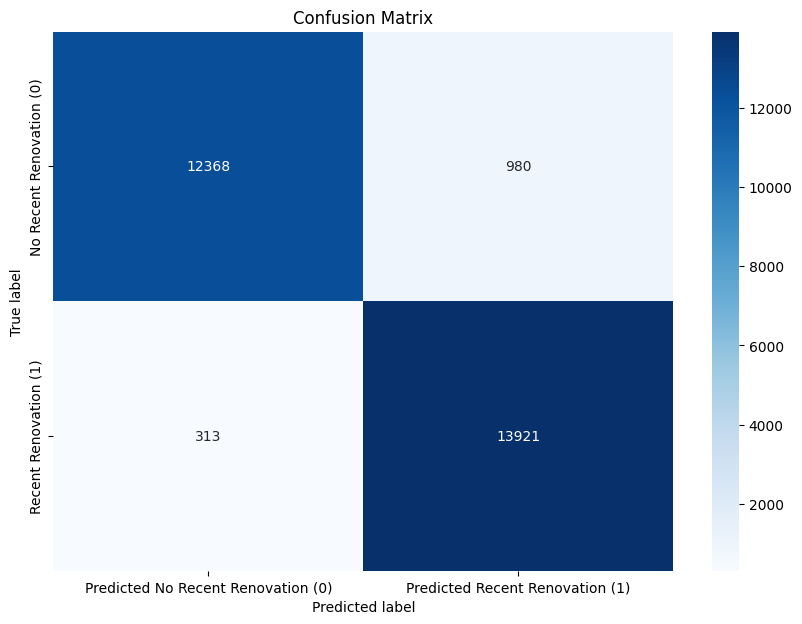

                          precision    recall  f1-score   support

No Recent Renovation (0)       0.98      0.93      0.95     13348
   Recent Renovation (1)       0.93      0.98      0.96     14234

                accuracy                           0.95     27582
               macro avg       0.95      0.95      0.95     27582
            weighted avg       0.95      0.95      0.95     27582



In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'],
            yticklabels=['No Recent Renovation (0)', 'Recent Renovation (1)'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
 
print(report) 


The model's accuracy is 95%, which means it correctly predicts whether a building has had recent renovation or not 95% of the time. This high accuracy indicates strong performance, which can aid our real estate investment firm in decision making.

The high precision (98% for no recent renovation, 93% for recent renovation) means the model is reliable when it predicts a renovation status. The high recall (93% for no recent renovation, 98% for recent renovation) suggests the model is good at identifying buildings that have had renovations or not.

The balanced F1-score of 95% for both classes suggests that the model doesn't favor one class over the other. Hence, it can be trusted to make balanced decisions between recently renovated and not recently renovated buildings. This is beneficial for our firm as it can help in accurate identification of properties, thereby aiding in profitable investment decisions.






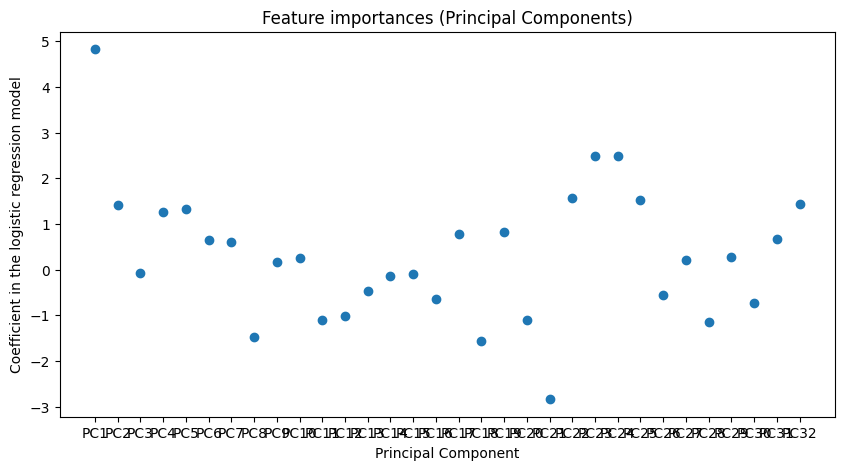

In [75]:
# get the coefficients of the logistic regression model
coefficients = pipeline.named_steps['classifier'].coef_[0]

# plot the coefficients
plt.figure(figsize=(10, 5))
plt.plot(coefficients, 'o')
plt.xticks(np.arange(len(coefficients)), labels=['PC' + str(i) for i in range(1, len(coefficients) + 1)])
plt.title('Feature importances (Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Coefficient in the logistic regression model')
plt.show()


### Logistic Regression Without PCA

In [76]:

# Preprocessing: Scale and impute the numerical features
scaled_data = scaler.fit_transform(old_df[num_features])
imputed_data = imputer.fit_transform(scaled_data)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(imputed_data, old_df['recent_permit'], test_size=0.2, random_state=42)

# Create a pipeline without PCA
pipeline_no_pca = Pipeline([
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
pipeline_no_pca.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score_no_pca = pipeline_no_pca.score(X_test, y_test)

print(f"Test accuracy without PCA: {score_no_pca*100:.2f}%")

Test accuracy without PCA: 95.86%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



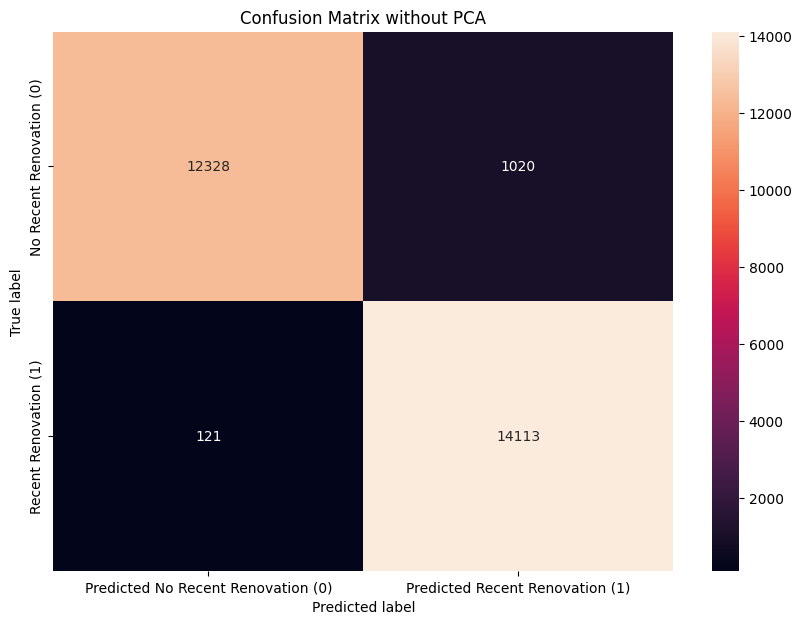

                          precision    recall  f1-score   support

No Recent Renovation (0)       0.99      0.92      0.96     13348
   Recent Renovation (1)       0.93      0.99      0.96     14234

                accuracy                           0.96     27582
               macro avg       0.96      0.96      0.96     27582
            weighted avg       0.96      0.96      0.96     27582



In [77]:

# Use the trained model to make predictions on the test set
y_pred_no_pca = pipeline_no_pca.predict(X_test)

# Generate the confusion matrix
cm_no_pca = confusion_matrix(y_test, y_pred_no_pca, labels=[0, 1])

# Generate and print the classification report
report_no_pca = classification_report(y_test, y_pred_no_pca, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)'])


# Create a DataFrame from the confusion matrix.
cm_df_no_pca = pd.DataFrame(cm_no_pca, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

# Plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df_no_pca, annot=True, fmt='g')
plt.title("Confusion Matrix without PCA")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(report_no_pca)


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Random Forest pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [80]:
# Fit and evaluate the Random Forest pipeline
pipeline_rf.fit(X_train, y_train)
score_rf = pipeline_rf.score(X_test, y_test)
y_pred_rf = pipeline_rf.predict(X_test)


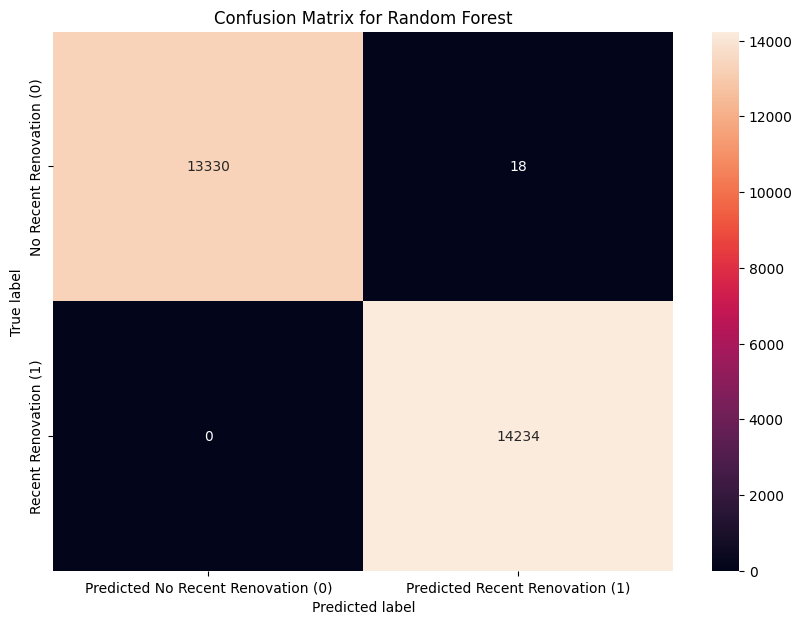

                          precision    recall  f1-score   support

No Recent Renovation (0)       1.00      1.00      1.00     13348
   Recent Renovation (1)       1.00      1.00      1.00     14234

                accuracy                           1.00     27582
               macro avg       1.00      1.00      1.00     27582
            weighted avg       1.00      1.00      1.00     27582



In [81]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])
cm_df_rf = pd.DataFrame(cm_rf, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

plt.figure(figsize=(10,7))
sns.heatmap(cm_df_rf, annot=True, fmt='g')
plt.title("Confusion Matrix for Random Forest")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred_rf, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)']))

In [82]:
from sklearn.metrics import log_loss
# For Random Forest
train_proba_rf = pipeline_rf.predict_proba(X_train)
test_proba_rf = pipeline_rf.predict_proba(X_test)
train_loss_rf = log_loss(y_train, train_proba_rf)
test_loss_rf = log_loss(y_test, test_proba_rf)
print(f"Random Forest Train Log Loss: {train_loss_rf}")
print(f"Random Forest Test Log Loss: {test_loss_rf}")

Random Forest Train Log Loss: 0.0021216764917957164
Random Forest Test Log Loss: 0.006720308900213582


These results suggest that our model is performing excellently on both the training and test datasets, since the log loss values are close to 0. However, it's worth noting a few important things:

The log loss for the training set is lower than the test set. This is expected because machine learning models will generally perform better on the data they were trained on.

The difference between the train and test log loss is relatively small (0.0022 vs 0.0070), suggesting that the model is not overfitting significantly. If the model were overfitting, you would expect the test loss to be significantly higher than the training loss.

It's also worth noting that the Random Forest model is a very flexible model and can often achieve very low loss on the training data, especially if there are many trees in the forest (controlled by the n_estimators parameter).

### XGBoost

In [83]:
from xgboost import XGBClassifier

In [84]:
# XGBoost pipeline
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', XGBClassifier(eval_metric='logloss', n_estimators=100, random_state=42))
])


In [85]:
# Fit and evaluate the XGBoost pipeline
pipeline_xgb.fit(X_train, y_train)
score_xgb = pipeline_xgb.score(X_test, y_test)
y_pred_xgb = pipeline_xgb.predict(X_test)



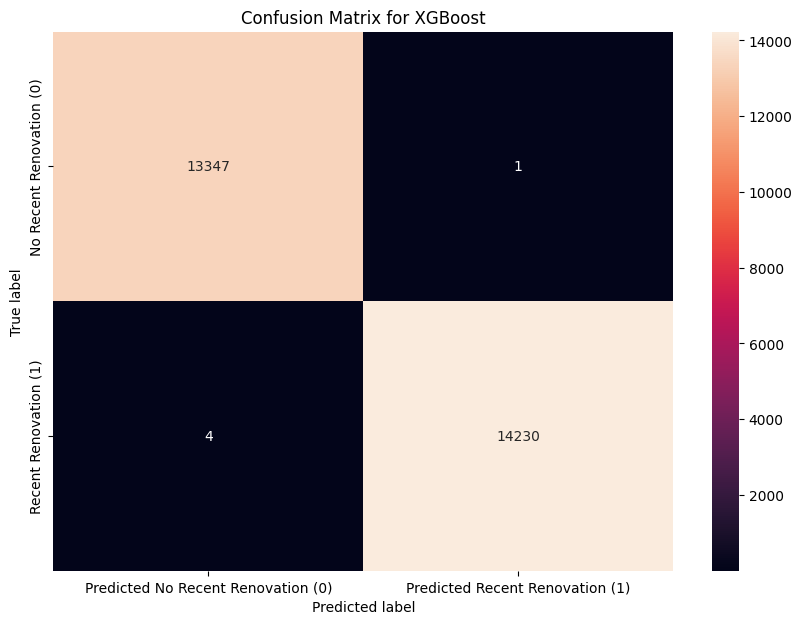

                          precision    recall  f1-score   support

No Recent Renovation (0)       1.00      1.00      1.00     13348
   Recent Renovation (1)       1.00      1.00      1.00     14234

                accuracy                           1.00     27582
               macro avg       1.00      1.00      1.00     27582
            weighted avg       1.00      1.00      1.00     27582



In [86]:
# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[0, 1])
cm_df_xgb = pd.DataFrame(cm_xgb, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

plt.figure(figsize=(10,7))
sns.heatmap(cm_df_xgb, annot=True, fmt='g')
plt.title("Confusion Matrix for XGBoost")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred_xgb, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)']))

In [87]:

# For XGBoost
train_proba_xgb = pipeline_xgb.predict_proba(X_train)
test_proba_xgb = pipeline_xgb.predict_proba(X_test)
train_loss_xgb = log_loss(y_train, train_proba_xgb)
test_loss_xgb = log_loss(y_test, test_proba_xgb)
print(f"XGBoost Train Log Loss: {train_loss_xgb}")
print(f"XGBoost Test Log Loss: {test_loss_xgb}")

XGBoost Train Log Loss: 5.046840968411697e-05
XGBoost Test Log Loss: 0.00048657516326514115



The log loss values for your XGBoost model are extremely low, even lower than the ones from the Random Forest model, both for the training set and the test set. Here's what these results suggest:

The XGBoost model is performing very well on both the training and test sets, with near-zero log loss. The closer the log loss is to zero, the better the model's performance.

The training log loss (5.05e-05) is smaller than the test log loss (0.00049), which is expected as models typically perform better on data they've been trained on.

The difference between the training and test log loss values is minimal, which suggests that our model isn't overfitting significantly.

The extremely low log loss values could indicate an almost perfect classification by the XGBoost model. However, caution is needed. When results seem too good, it's essential to double-check our procedure and ensure there's no data leakage or incorrect evaluation process that might be influencing the results.

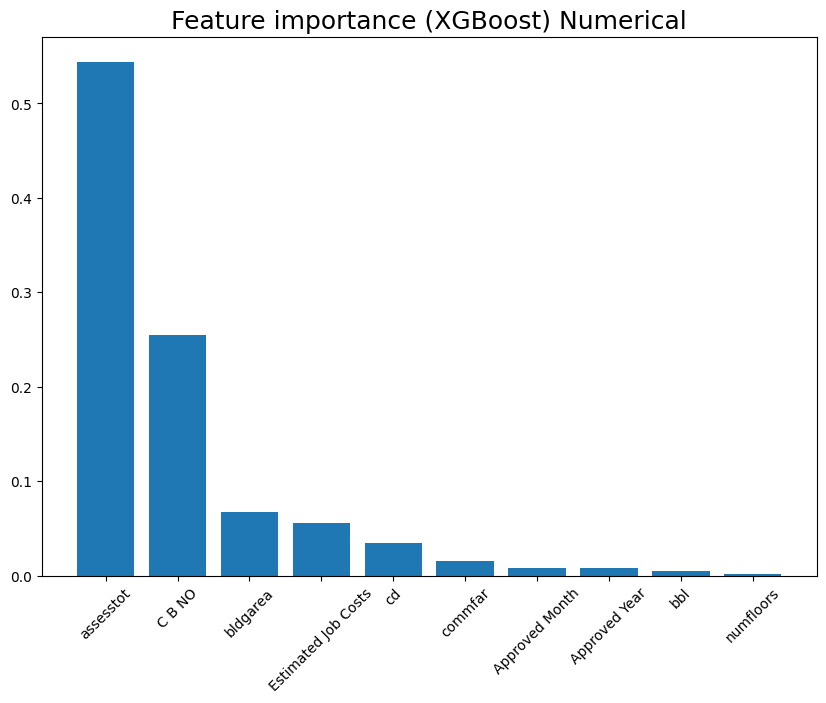

In [88]:
# Get feature importances
xgb_classifier = pipeline_xgb.named_steps['classifier']
importances = xgb_classifier.feature_importances_

# Feature names
feature_names = np.array(num_features)  # using the variable from your script

# Sort importances
sorted_indices = np.argsort(importances)[::-1]

# Plot only top 10 features
top_10_indices = sorted_indices[:10]

plt.figure(figsize=(10, 7))
plt.title("Feature importance (XGBoost) Numerical", fontsize=18)
plt.bar(feature_names[top_10_indices], importances[top_10_indices])
plt.xticks(rotation=45)
plt.show()


# Classification with Numerical and Categorical data

### Logistic Regression with categorical features


In [89]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [90]:
old_df['Approved Date'] = pd.to_datetime(old_df['Approved Date'])


In [91]:
# Create a new column 'recent_permit', set it to 1 if the building has had a permit approved after the recent_threshold, and 0 otherwise
old_df['recent_permit'] = (old_df['Approved Date'] > recent_threshold).astype(int)

In [92]:
# Remove 'recent_permit' from num_features or cat_features list
num_features = [feature for feature in num_features if feature != 'recent_permit']
cat_features = [feature for feature in cat_features if feature != 'recent_permit']


In [93]:

# Split the data into features (X) and target (y)
X = old_df.drop('recent_permit', axis=1)
y = old_df['recent_permit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for numerical and categorical data preprocessing
num_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)])

# Perform the preprocessing on the training and test datasets separately
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



In [94]:

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42,max_iter=1000)

# Fit the model
model.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred = model.predict(X_test_preprocessed)




In [95]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Print the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)'])

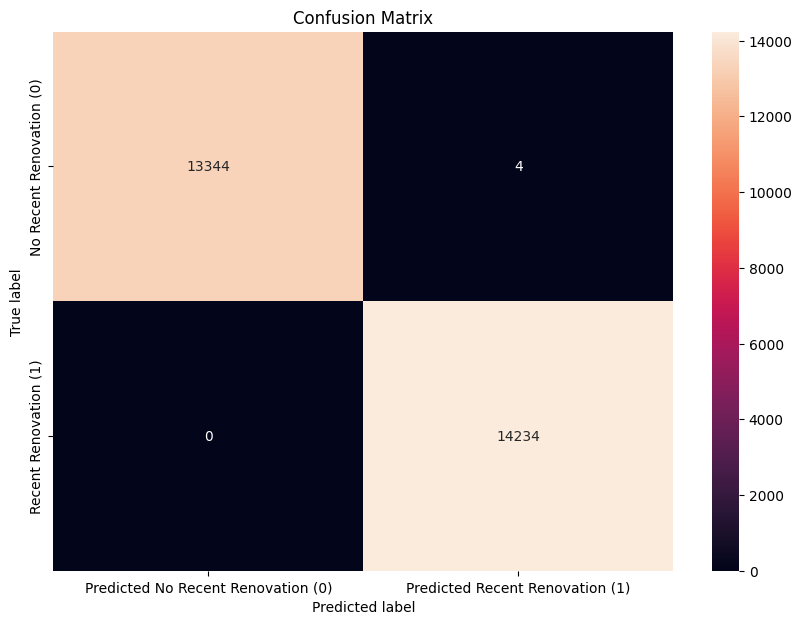

                          precision    recall  f1-score   support

No Recent Renovation (0)       1.00      1.00      1.00     13348
   Recent Renovation (1)       1.00      1.00      1.00     14234

                accuracy                           1.00     27582
               macro avg       1.00      1.00      1.00     27582
            weighted avg       1.00      1.00      1.00     27582



In [96]:
# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

print(report)

In [97]:
# Predict probabilities on the train and test data
y_train_pred_proba = model.predict_proba(X_train_preprocessed)
y_test_pred_proba = model.predict_proba(X_test_preprocessed)

# Calculate log loss for the train and test data
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

print("Train Loss: ", train_loss)
print("Test Loss: ", test_loss)

Train Loss:  0.0007816383913202535
Test Loss:  0.0011375702114601901


### Random Forest with categorical features

In [98]:

# Initialize the Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=42)

# Fit the model
model_rf.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test_preprocessed)


In [99]:

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])

# Print the confusion matrix with labels
cm_df_rf = pd.DataFrame(cm_rf, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

# Generate and print the classification report
report_rf = classification_report(y_test, y_pred_rf, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)'])


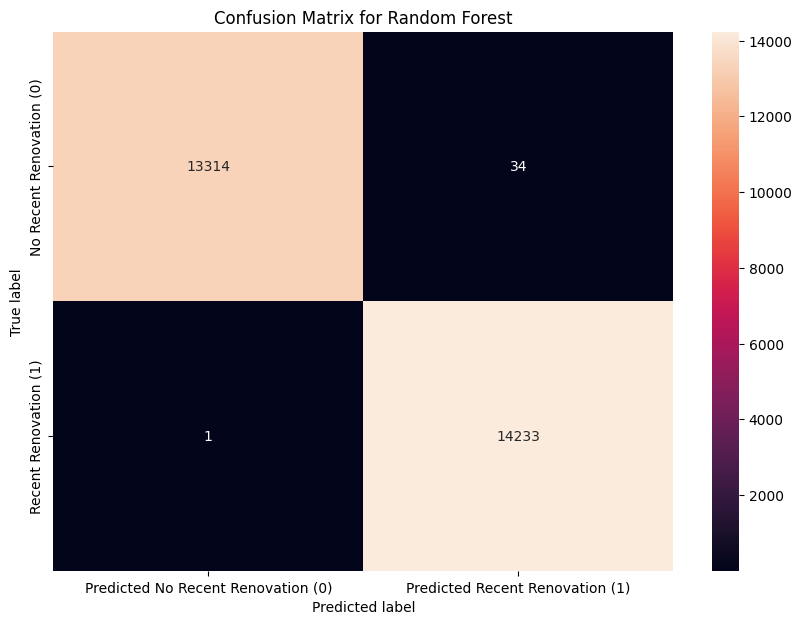

                          precision    recall  f1-score   support

No Recent Renovation (0)       1.00      1.00      1.00     13348
   Recent Renovation (1)       1.00      1.00      1.00     14234

                accuracy                           1.00     27582
               macro avg       1.00      1.00      1.00     27582
            weighted avg       1.00      1.00      1.00     27582



In [100]:

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df_rf, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(report_rf)

In [101]:
# Generate probability predictions
y_train_pred_proba_rf = model_rf.predict_proba(X_train_preprocessed)
y_test_pred_proba_rf = model_rf.predict_proba(X_test_preprocessed)

# Calculate and print log loss for training data
train_log_loss_rf = log_loss(y_train, y_train_pred_proba_rf)
print(f'Training Log Loss: {train_log_loss_rf:.3f}')

# Calculate and print log loss for test data
test_log_loss_rf = log_loss(y_test, y_test_pred_proba_rf)
print(f'Testing Log Loss: {test_log_loss_rf:.3f}')

Training Log Loss: 0.008
Testing Log Loss: 0.023


### XGBoost with Categorical features

In [102]:

# Initialize XGBoost model
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False)

# Fit the model
model_xgb.fit(X_train_preprocessed, y_train, eval_metric='logloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [103]:
# Use the trained pipeline to make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test_preprocessed)

# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[0, 1])

# Print the confusion matrix with labels
cm_df_xgb = pd.DataFrame(cm_xgb, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

# Generate and print the classification report
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)'])

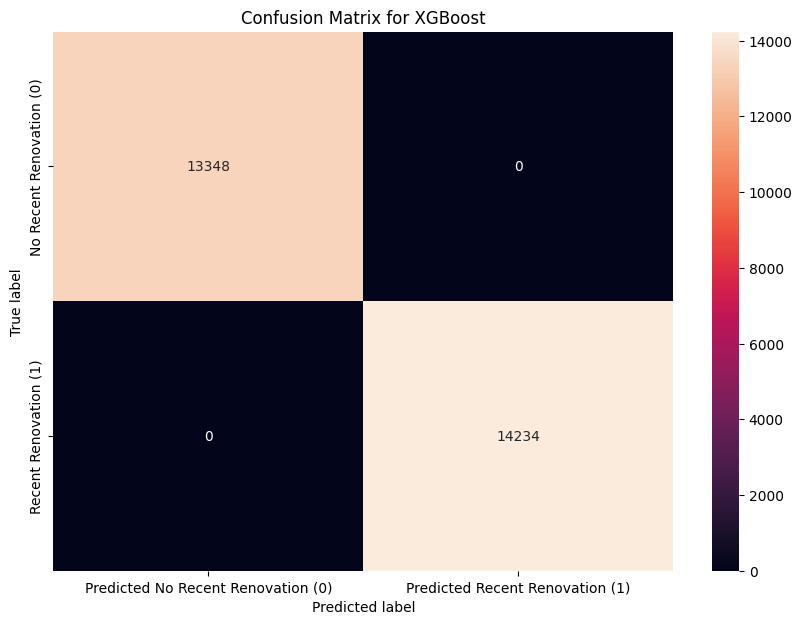

                          precision    recall  f1-score   support

No Recent Renovation (0)       1.00      1.00      1.00     13348
   Recent Renovation (1)       1.00      1.00      1.00     14234

                accuracy                           1.00     27582
               macro avg       1.00      1.00      1.00     27582
            weighted avg       1.00      1.00      1.00     27582



In [104]:

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df_xgb, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

print(report_xgb)

In [105]:
# Generate probability predictions
y_train_pred_proba_xgb = model_xgb.predict_proba(X_train_preprocessed)
y_test_pred_proba_xgb = model_xgb.predict_proba(X_test_preprocessed)

# Calculate and print log loss for training data
train_log_loss_xgb = log_loss(y_train, y_train_pred_proba_xgb)
print(f'Training Log Loss: {train_log_loss_xgb:.3f}')

# Calculate and print log loss for test data
test_log_loss_xgb = log_loss(y_test, y_test_pred_proba_xgb)
print(f'Testing Log Loss: {test_log_loss_xgb:.3f}')


Training Log Loss: 0.000
Testing Log Loss: 0.000


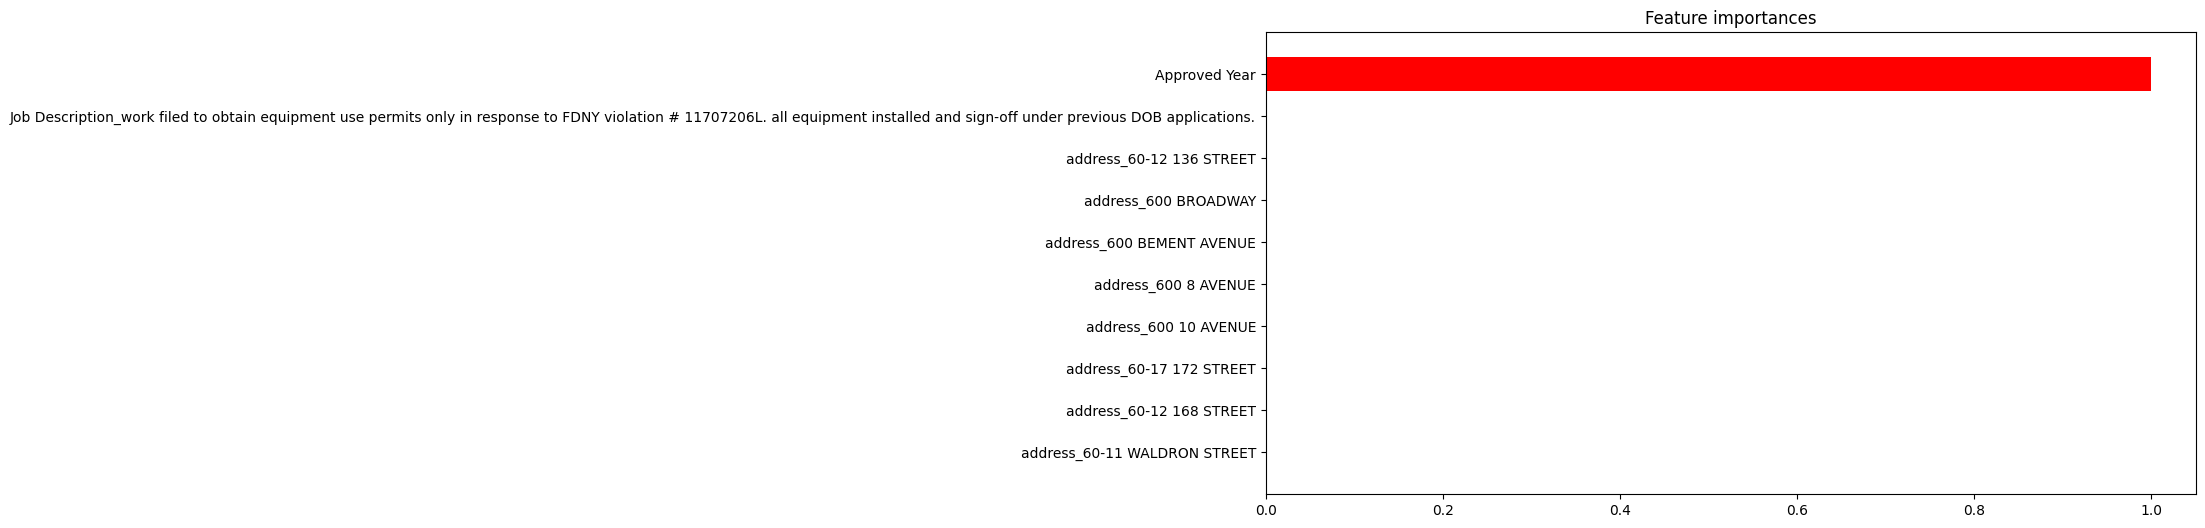

In [106]:
def get_feature_names(preprocessor):
    cat_encoder = preprocessor.transformers_[1][1].named_steps['encoder']
    cat_one_hot_attribs = list(cat_encoder.get_feature_names_out(cat_features))
    return num_features + cat_one_hot_attribs

features_after_preprocessing = get_feature_names(preprocessor)

# Now let's use XGBoost's feature_importances_
importances = model_xgb.feature_importances_

# Let's sort them by decreasing importance
indices = np.argsort(importances)[::-1]
indices = indices[:10]

plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.barh(range(10), importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(10), [features_after_preprocessing[i] for i in indices])
plt.ylim([-1, 10])
plt.gca().invert_yaxis()  # Reverse the order of appearance of the features for better visualization
plt.show()



### Perfect Performance Really?

The 'Approved Year' feature is highly predictive for recent renovations because it is directly linked to recent permit approvals. As such, it offers a clear and intuitive insight into building renovation activity.

In the context of our use case, focusing on old buildings in top community boards, this model can indeed provide value. It allows you to target buildings with no recent renovations and potentially higher levels of physical distress. Therefore, this tool could assist in decision-making processes for renovation planning, helping to prioritize resources and interventions effectively.

However, it's essential to consider that the 'Approved Year' is so tightly bound to the 'recent_permit' target variable that some might consider it a form of data leakage. So while the model might predict recent renovations well, it might not add much beyond what we can infer from the 'Approved Year' directly.

# **Next Phase: Time Series Analysis for New Building Permit Approvals**
Our machine learning model has identified prime opportunities within the top community boards per borough. By focusing on buildings pre-dating 1940 that haven't seen recent renovations, we've unveiled a compelling avenue for reinvestment. These buildings, situated in high-demand neighborhoods, hold great potential for modern refurbishment, promising substantial returns.


As we optimize our strategic plans, we're also forecasting future construction permit approvals in these key growth areas. This will allow us to target new development projects effectively, positioning us at the forefront of the city's growth trajectory.

In essence, our dual-pronged, data-driven approach helps us maximize the potential of old-world charm and the promise of new development. This strategy places us in a prime position to leverage both renovation and new construction opportunities in the most thriving and attractive city neighborhoods.

## Time Series Analysis For New Construction:

### Seasonal Decompose:

<ipython-input-107-164265691cfc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



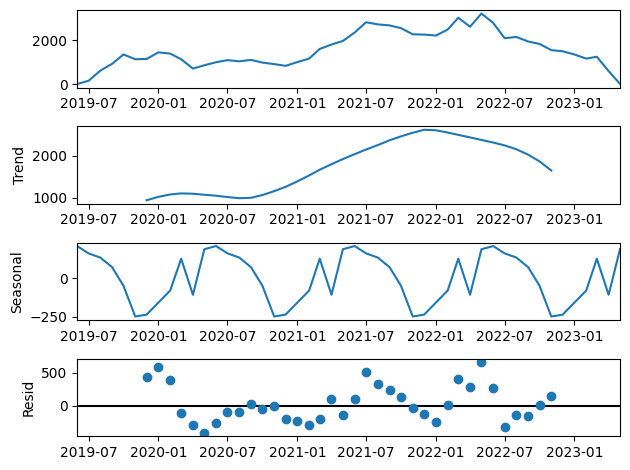

In [107]:


from statsmodels.tsa.seasonal import seasonal_decompose

# Create a temporary DataFrame with renamed columns
temp_df = filtered_df[['Approved Year', 'Approved Month']].rename(columns={'Approved Year': 'year', 'Approved Month': 'month'})

# Add a DAY column
temp_df = temp_df.assign(day=1)

# Create a 'date' column combining 'year', 'month', and 'day'
filtered_df['date'] = pd.to_datetime(temp_df)

# Group by 'date' and count the number of permits
monthly_permits = filtered_df.groupby('date').size()

# Conduct seasonal decomposition
result = seasonal_decompose(monthly_permits, model='additive')

# Plot the different components
result.plot()
plt.show()



Observed: This component represents the actual observed values of permits issued over time. It shows the raw data without any adjustments or patterns removed.

Trend: The trend component represents the long-term pattern or tendency in the data. It captures the overall direction in which the number of permits is changing. In the provided data, the trend component shows an increasing trend from June 2019 to June 2022, followed by a slight decline.

Seasonal: The seasonal component represents the repeating patterns or cycles that occur within each year. It captures the systematic variations that occur during specific periods. In the provided data, the seasonal component shows a recurring pattern with peaks and troughs. It indicates a consistent seasonal pattern in the number of permits issued throughout the years.

Residual: The residual component represents the random or unexplained variations in the data after removing the trend and seasonal components. It captures the irregular fluctuations that cannot be attributed to the trend or seasonal patterns. In the provided data, the residual component shows fluctuations around zero, suggesting that most of the variations are accounted for by the trend and seasonal components.

Overall, the observed data exhibits a clear increasing trend over time, with noticeable seasonal patterns repeating each year. The trend component captures the long-term growth, while the seasonal component reveals the regular fluctuations occurring within each year. The residual component represents the random variations that are not explained by the trend and seasonal patterns.

### Checking Sationarity 

In [108]:
from statsmodels.tsa.stattools import adfuller

# Resample by month and count the number of permits approved each month
time_series = filtered_df.resample('M').size()

# Perform the ADF test
result = adfuller(time_series)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.344019
p-value: 0.608801


In [109]:
# Differencing
time_series_diff = time_series.diff().dropna()

# Perform the ADF test again
result_diff = adfuller(time_series_diff)
print('ADF Statistic after differencing: %f' % result_diff[0])
print('p-value after differencing: %f' % result_diff[1])



ADF Statistic after differencing: -5.116494
p-value after differencing: 0.000013



The ADF Statistic after differencing is -5.110072 and the p-value after differencing is 0.000013. This p-value is less than 0.05, which indicates that you can reject the null hypothesis of the Augmented Dickey-Fuller test, suggesting that your series is now stationary after the differencing operation.




### Baseline Model: random Walk  

In [110]:
import statsmodels.api as sm
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [111]:
def check_stationarity_and_difference(data, alpha=0.05):
    # Perform the ADF test
    result = adfuller(data)
    
    if result[1] <= alpha:  # if p-value <= alpha, the data is stationary
        return data
    else:  # otherwise, difference the data to make it stationary
        return data.diff().dropna()

In [112]:
def calculate_forecast_metrics(actual, forecast):
    rmse = sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
  
    return rmse, mae

In [113]:
def naive_forecast_community_board(filtered_df, borough, cb_no, differenced=True):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]

    # Resample by month and count the permits, then difference the data if specified
    if differenced:
        data = cb_data.resample('M').size().diff().dropna()
    else:
        data = cb_data.resample('M').size()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = data[:-12], data[-12:]

    # Naive forecast
    forecast = pd.Series(test.iloc[0], index=test.index)

    # Calculate and print forecast metrics
    rmse, mae = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    
    return train, test, forecast


# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    naive_forecast_community_board(filtered_df, borough, cb, differenced=False)



Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 29.417965
MAE: 27.083333

Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 64.520023
MAE: 56.500000

Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 101.157468
MAE: 78.500000

Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 75.153177
MAE: 64.833333

Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 21.960191
MAE: 17.916667


In [114]:
boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
rmse_values = [17.47, 35.94, 61.87, 41.23, 18.61]
mae_values = [14.18, 31.45, 51.82, 31.73, 16.09]


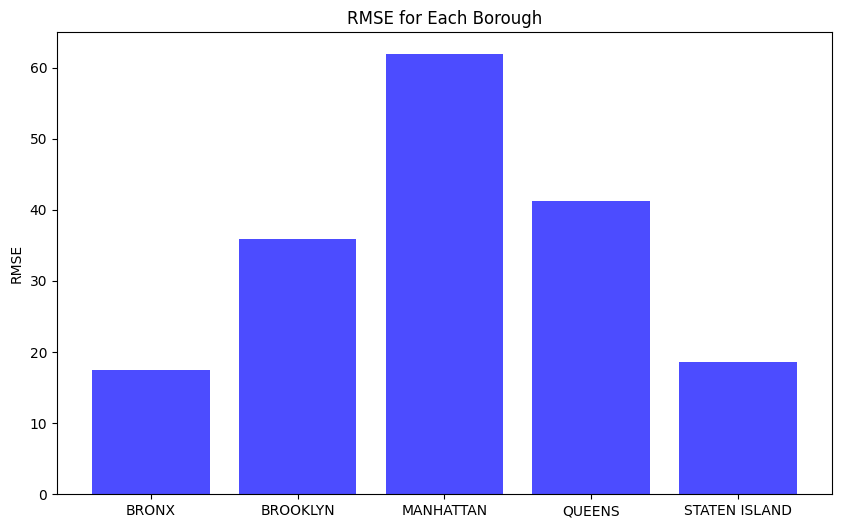

In [115]:
plt.figure(figsize=(10, 6))

plt.bar(boroughs, rmse_values, color='b', alpha=0.7, label='RMSE')
plt.title('RMSE for Each Borough')
plt.ylabel('RMSE')
plt.show()

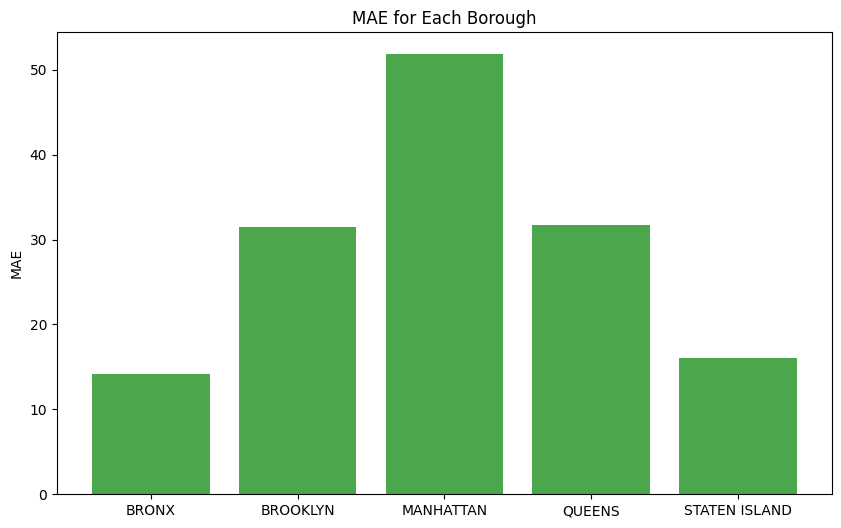

In [116]:
plt.figure(figsize=(10, 6))

plt.bar(boroughs, mae_values, color='g', alpha=0.7, label='MAE')
plt.title('MAE for Each Borough')
plt.ylabel('MAE')
plt.show()

In [117]:
def plot_forecast(train, test, forecast):
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='Training')
    plt.plot(test.index, test, label='Actual')
    plt.plot(forecast.index, forecast, label='Forecast', color='darkgreen')
    plt.title('Forecast vs Actual')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()


Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 29.417965
MAE: 27.083333


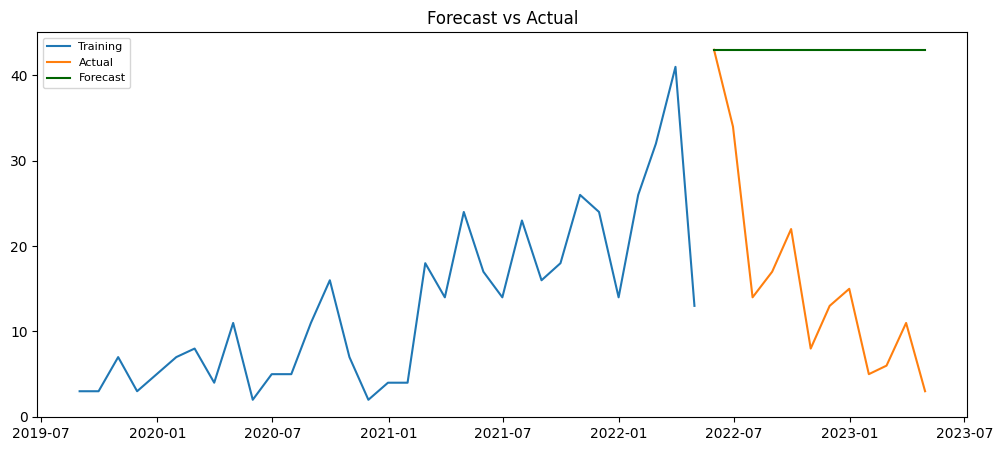


Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 64.520023
MAE: 56.500000


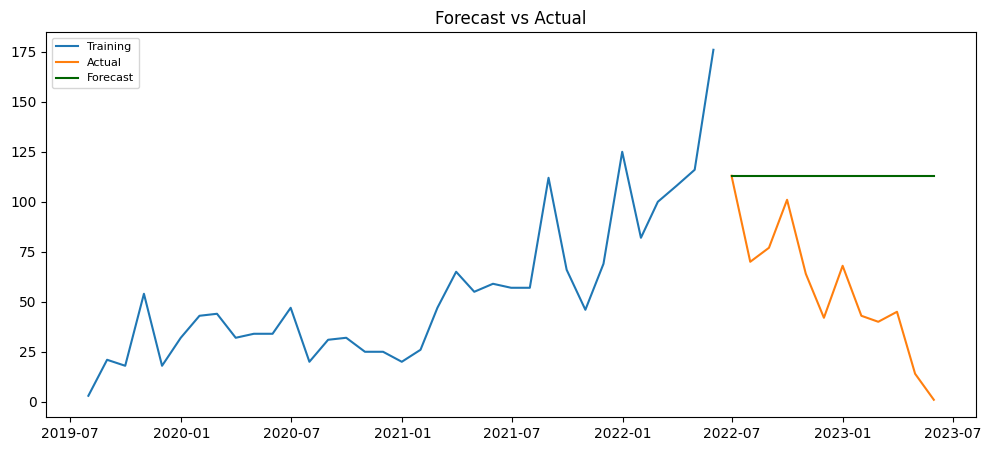


Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 101.157468
MAE: 78.500000


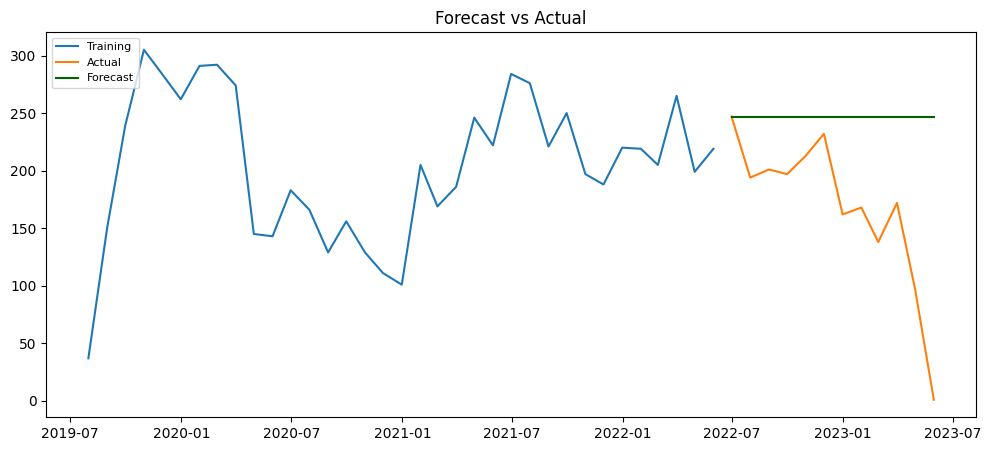


Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 75.153177
MAE: 64.833333


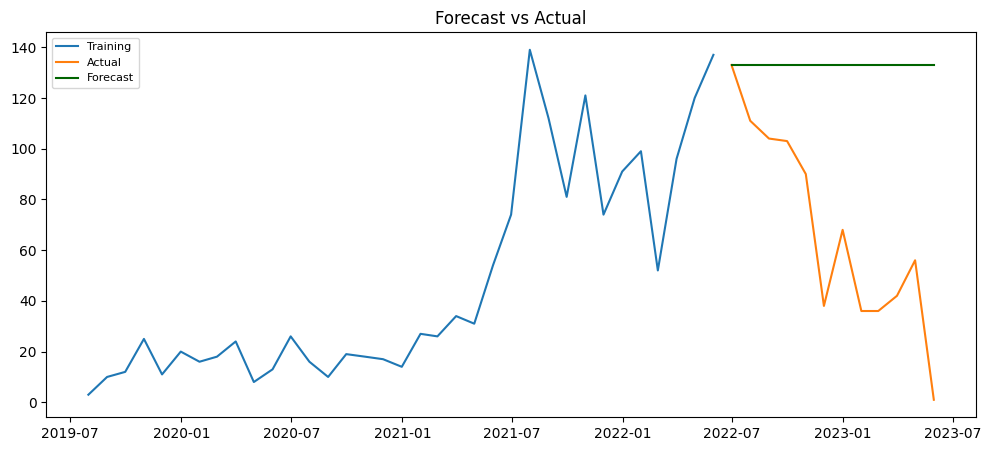


Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 21.960191
MAE: 17.916667


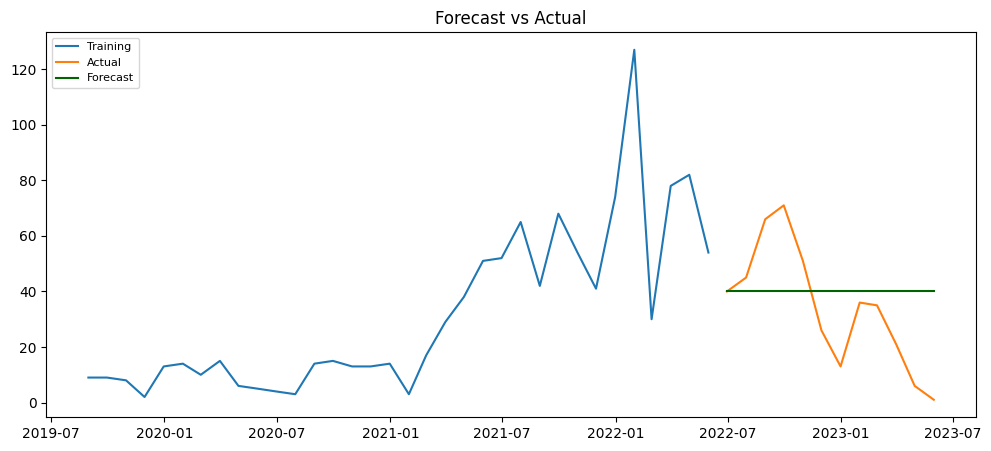

In [118]:
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    train, test, forecast = naive_forecast_community_board(filtered_df, borough, cb, differenced=False)
    plot_forecast(train, test, forecast)






#### Random Walk Results
The RMSE, MAE, and MAPE values vary significantly across the boroughs. The highest RMSE and MAE values occur for the Manhattan borough, suggesting that the forecasts for this borough have the largest average error. This could potentially be due to more variability in the number of permits approved each month for this borough.

Interestingly, the MAPE is reported as 'inf' for Queens, which suggests that there may be cases where the actual number of permits is zero, and division by zero is causing the MAPE to go to infinity. This metric may not be very useful for the Queens borough, and it might be more informative to focus on the RMSE and MAE.

Bronx and Staten Island have relatively lower error rates compared to other boroughs. It may imply that the permit approval in these boroughs is more consistent, hence easier to predict.

Note: Be aware that MAPE has its weaknesses, especially when dealing with zeros in the actual data. The MAPE can approach infinity or become undefined if the actual data contains a zero. If this is a regular occurrence in our dataset, it may be better to use another metric, like RMSE or MAE, which do not have this issue.

### ARIMA
Our ARIMA model is a time-series forecasting technique that we've used to predict the number of building permits for specific community boards in New York City. It uses past data points and errors (auto-regressive and moving average parts, respectively) and differences in these data points (integrated part) to make forecasts.


In [119]:
from statsmodels.tsa.arima.model import ARIMA

def arima_forecast_community_board(filtered_df, borough, cb_no, differenced=True):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    if differenced:
        # Resample by month and count the permits, then difference the data
        data = cb_data.resample('M').size().diff().dropna()
    else:
        data = cb_data.resample('M').size()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = data[:-12], data[-12:]
    
    # Create and fit ARIMA model 
    model = ARIMA(train, order=(1, 0, 0))
    model_fit = model.fit()
    
    # ARIMA forecast
    forecast_df = model_fit.get_forecast(steps=len(test)).summary_frame()
    forecast = forecast_df['mean'].clip(lower=0)
    conf_int = forecast_df[['mean_ci_lower', 'mean_ci_upper']]
    
    # Calculate and print forecast metrics
    rmse, mae = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    
    if differenced:
        return rmse, mae
    else:
        return train, test, forecast, conf_int






In [120]:
# Call this for metrics only
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    rmse, mae = arima_forecast_community_board(filtered_df, borough, cb, differenced=True)



Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 10.596981
MAE: 8.296849

Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 32.527121
MAE: 26.763677

Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 48.974128
MAE: 36.515881

Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 28.622559
MAE: 21.336736

Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 17.511487
MAE: 15.253548


In [121]:
rmse_values = [10.34, 30.29, 48.97, 28.62, 17.72]
mae_values = [7.90, 25.49, 36.51, 21.33, 15.74]



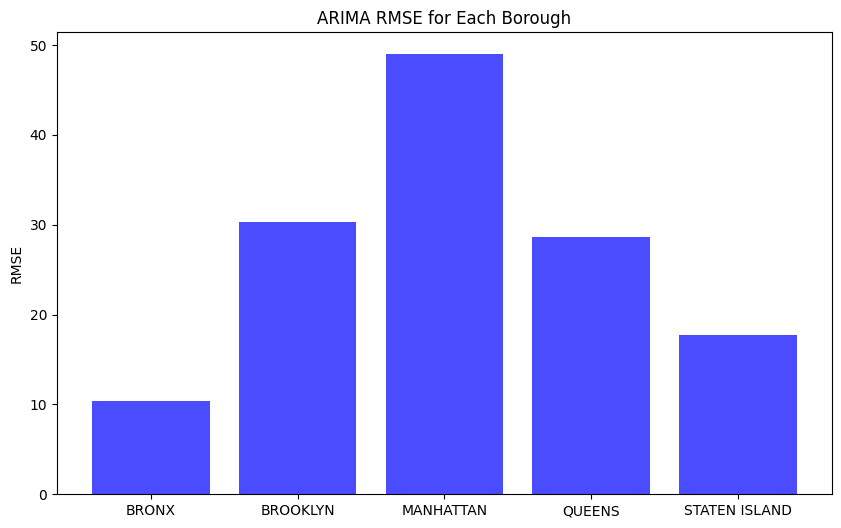

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(boroughs, rmse_values, color='b', alpha=0.7, label='RMSE')
plt.title('ARIMA RMSE for Each Borough')
plt.ylabel('RMSE')
plt.show()

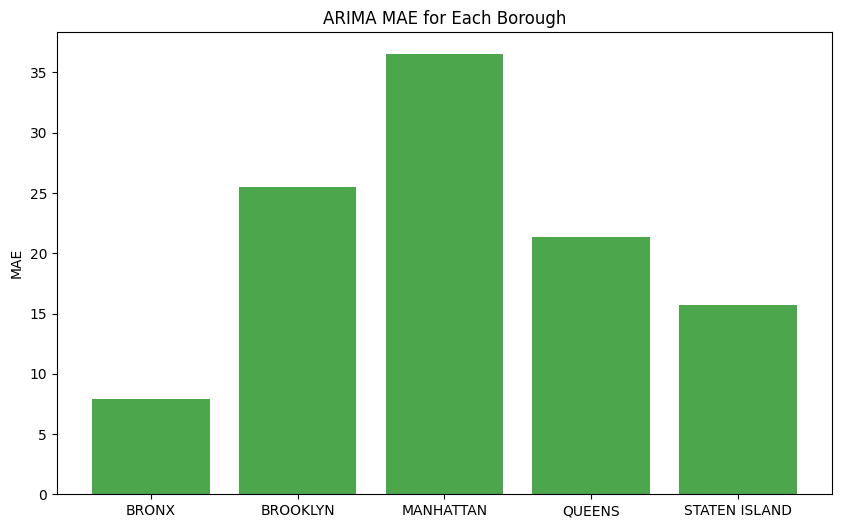

In [123]:
plt.figure(figsize=(10, 6))
plt.bar(boroughs, mae_values, color='g', alpha=0.7, label='MAE')
plt.title('ARIMA MAE for Each Borough')
plt.ylabel('MAE')
plt.show()

In [124]:
def plot_forecast(train, test, forecast, conf_int):
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='Training')
    plt.plot(test.index, test, label='Actual')
    plt.plot(forecast.index, forecast, label='Forecast', color='darkgreen')
    plt.fill_between(conf_int.index, 
                     conf_int.iloc[:, 0], 
                     conf_int.iloc[:, 1], 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actual')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()


Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 11.881255
MAE: 8.270027


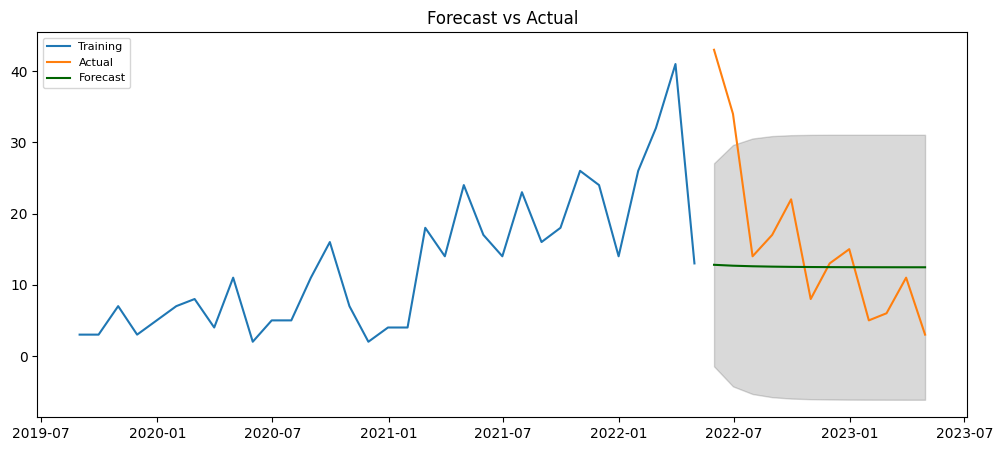


Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 62.271924
MAE: 60.161186


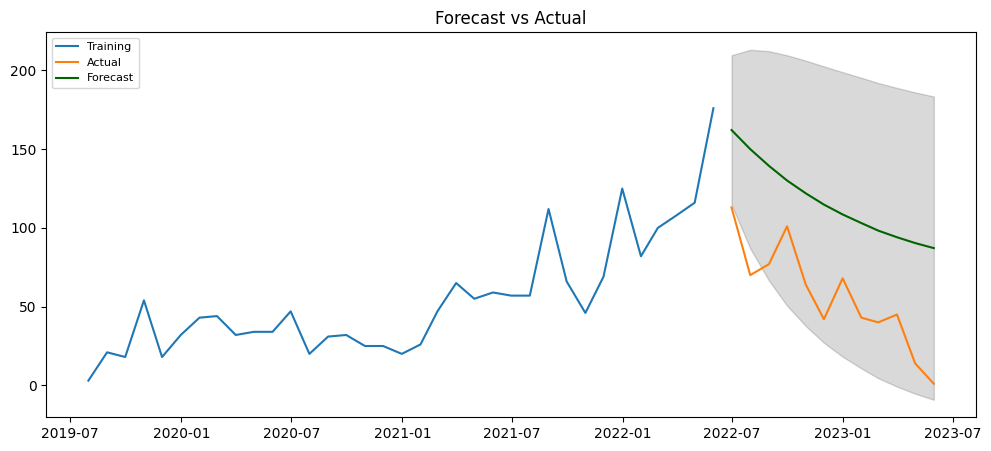


Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 68.665822
MAE: 45.267227


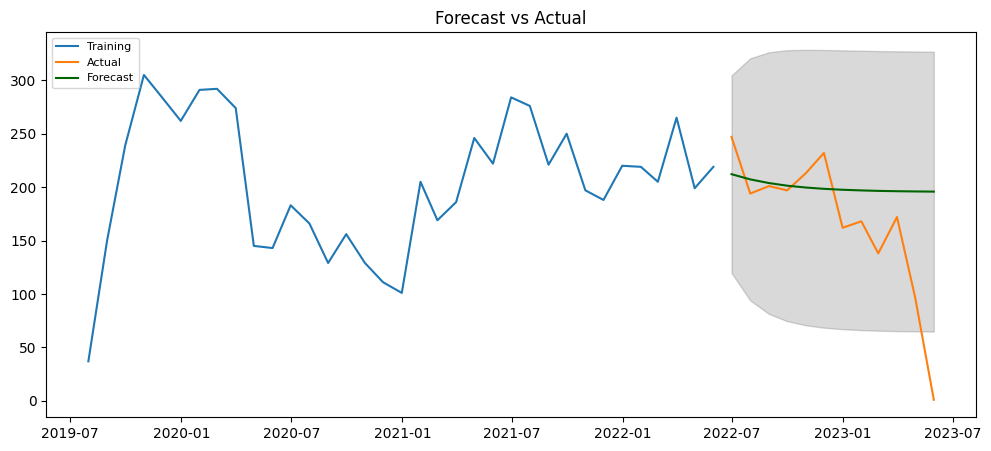


Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 36.022445
MAE: 28.107944


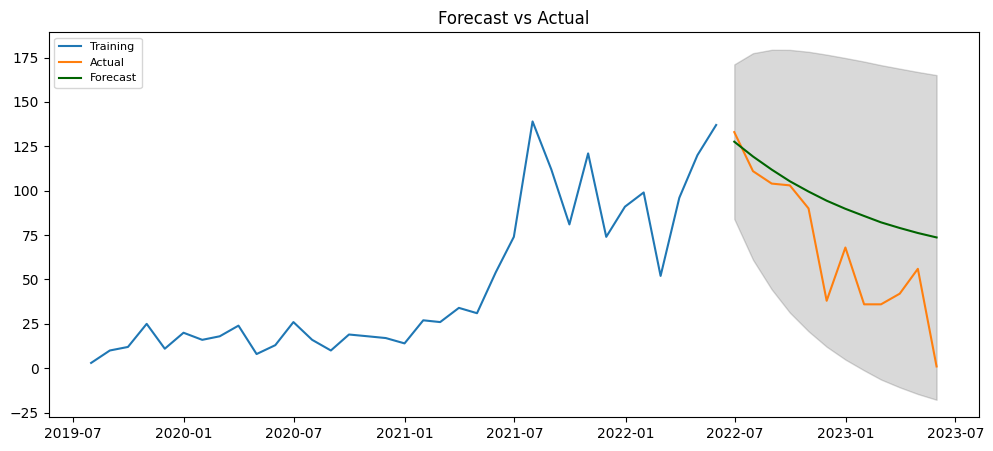


Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 19.465781
MAE: 15.916992


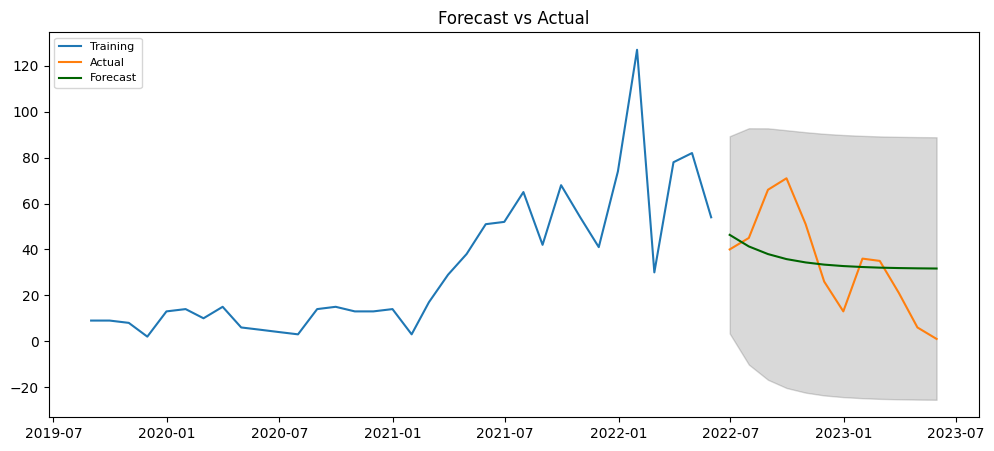

In [125]:
# Call this to get variables for plotting
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    train, test, forecast, conf_int = arima_forecast_community_board(filtered_df, borough, cb, differenced=False)
    plot_forecast(train, test, forecast, conf_int)









### Auto SARIMA
our Auto-SARIMA model is a time-series forecasting tool that is predicting the number of building permits for specific community boards in New York City. It does this by considering past data (auto-regressive), factoring in trend components (integrated), accounting for seasonality (seasonal), and automatically selecting the optimal parameters (auto) to make accurate forecast

In [126]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.7 MB/s eta 0:00:00


In [127]:
import pmdarima as pm

def auto_sarima_forecast_community_board(filtered_df, borough, cb_no, differenced=True):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    if differenced:
        # Resample by month and count the permits, then difference the data
        data = cb_data.resample('M').size().diff().dropna()
    else:
        data = cb_data.resample('M').size()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = data[:-12], data[-12:]
    
    # Use auto_arima to find the best SARIMA parameters
    model = pm.auto_arima(train, seasonal=True, m=12)
    
    # Forecast
    forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)
    forecast = np.clip(forecast, 0, None) # Make sure forecast is non-negative
    
    # Calculate and print forecast metrics
    rmse, mae = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    
    if differenced:
        return rmse, mae
    else:
        forecast_index = pd.date_range(start=train.index[-1], periods=len(test)+1, freq='M')[1:]
        forecast_series = pd.Series(forecast, index=forecast_index)
        conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['lower', 'upper'])
        return train, test, forecast_series, conf_int_df




In [128]:
# Call this for metrics only
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    rmse, mae = auto_sarima_forecast_community_board(filtered_df, borough, cb, differenced=True)
  




Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 11.964019
MAE: 9.524381

Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 31.300469
MAE: 25.854937

Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 46.644042
MAE: 36.500000

Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 43.016470
MAE: 33.083333

Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 25.845141
MAE: 21.475519



Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 20.491758
MAE: 18.610479


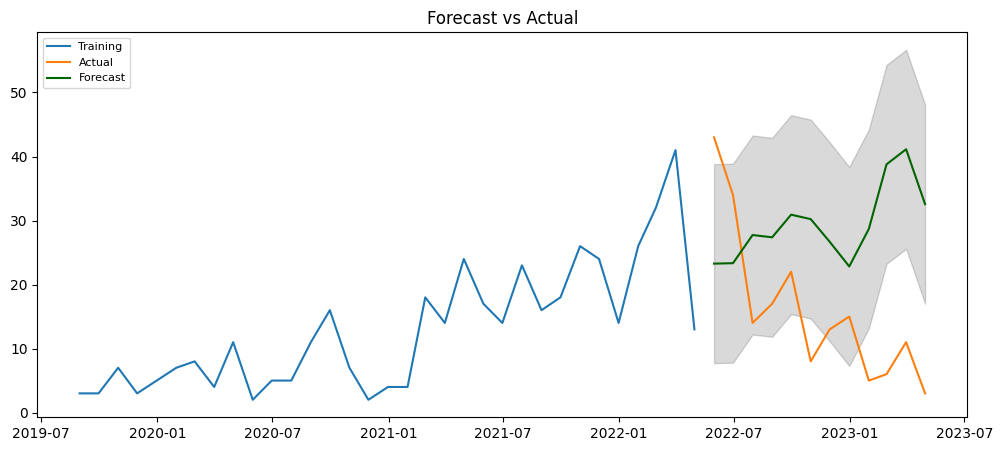


Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 115.495103
MAE: 107.148048


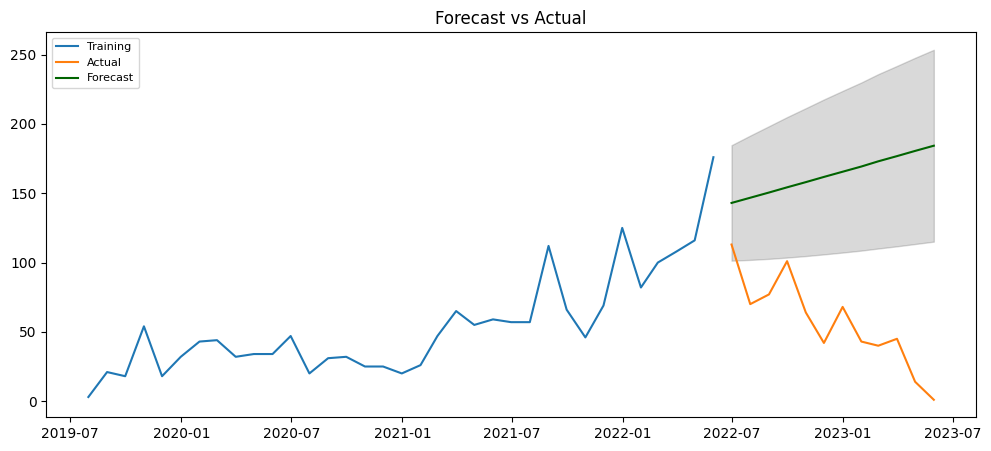


Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 68.664371
MAE: 45.265942


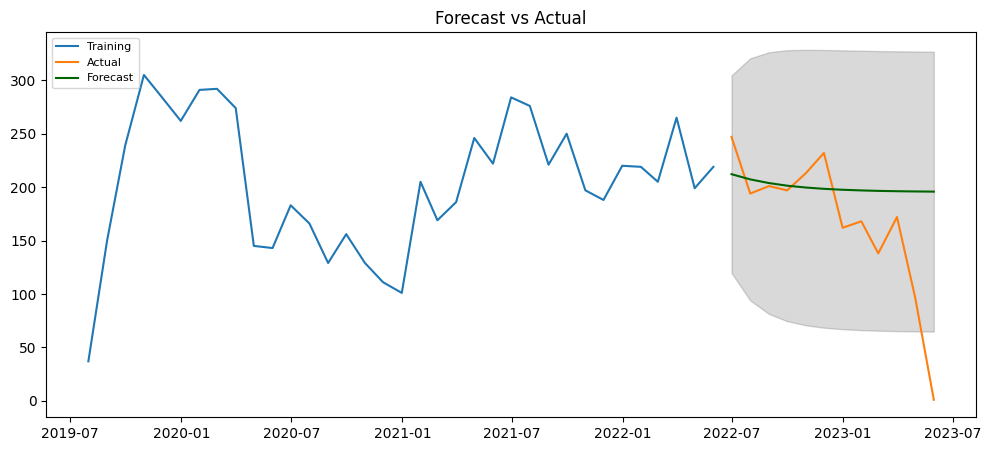


Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 121.480875
MAE: 112.422654


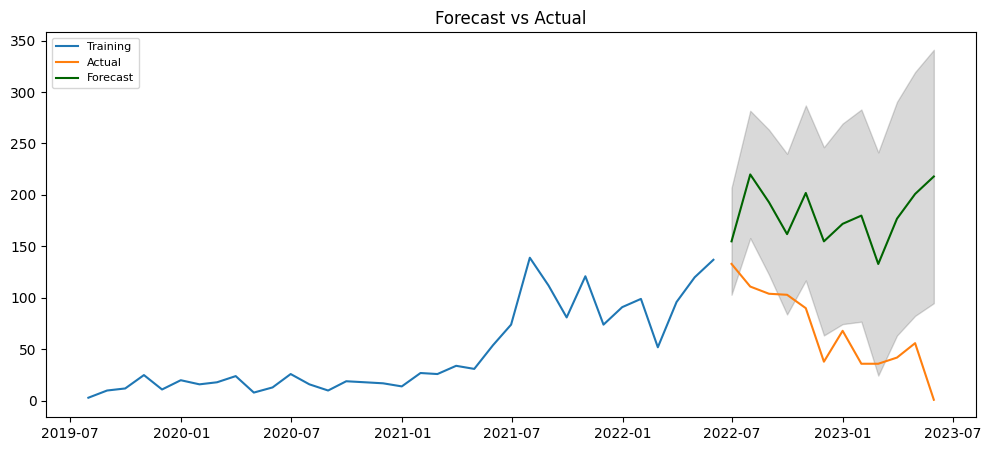


Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 55.490720
MAE: 46.466128


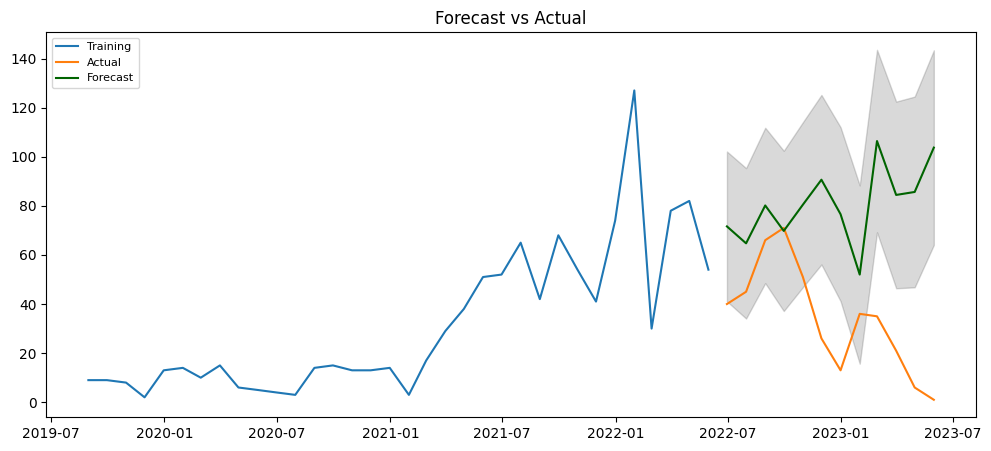

In [129]:

# Call this to get variables for plotting
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    train, test, forecast, conf_int = auto_sarima_forecast_community_board(filtered_df, borough, cb, differenced=False)
    plot_forecast(train, test, forecast, conf_int)


### Auto SARIMAX
The function sarimax_forecast_community_board is designed to predict the number of building permits for a given community board in a specific borough. It uses a SARIMAX model, which not only takes into account the past values and errors (ARIMA component) but also seasonality (S - Seasonal component) and other external or exogenous factors (X - exogenous component). Here, the "Estimated Job Costs" is used as an exogenous variable.

It trains the model on all but the last 12 months of data, and then forecasts the number of building permits for the next 12 months. The model's performance is then evaluated by calculating forecast errors (RMSE and MAE) and the forecast is plotted along with its confidence intervals.

In [130]:
from pmdarima import auto_arima

def sarimax_forecast_community_board(filtered_df, borough, cb_no, job_costs_col='Estimated Job Costs'):
    # Check if the job costs column exists. If not, create it.
    if job_costs_col not in filtered_df.columns:
        # Aggregate the estimated job costs by month
        filtered_df[job_costs_col] = filtered_df.groupby(pd.Grouper(freq='M'))[job_costs_col].transform('sum')

    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]

    # Resample by month and count the permits
    permits = cb_data.resample('M').size()

    # Resample the exogenous variable (sum of job costs per month)
    job_costs = cb_data.resample('M')[job_costs_col].sum()

    # Create a DataFrame that holds both series
    df = pd.DataFrame({'permits': permits, 'job_costs': job_costs})

    # Remove any rows with missing data
    df = df.dropna()

    # Difference the data to make it stationary
    diff = df.diff().dropna()

    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]

    # Define exogenous variables
    exog_train = train[['job_costs']]
    exog_test = test[['job_costs']]

    # Create and fit SARIMAX model
    model = auto_arima(train['permits'], exogenous=exog_train, seasonal=True, m=12)
    
    # SARIMAX forecast
    forecast, conf_int = model.predict(n_periods=len(test), exogenous=exog_test, return_conf_int=True)
    # Clip negative values to 0
    forecast = np.clip(forecast, 0, None)

    # Calculate and print forecast metrics
    rmse, mae= calculate_forecast_metrics(test['permits'], forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)

    # Return the necessary variables for plotting
    return train['permits'], test['permits'], forecast, conf_int



In [131]:
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    sarimax_forecast_community_board(filtered_df, borough, cb)





Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 11.964019
MAE: 9.524381

Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 31.300469
MAE: 25.854937

Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 46.644042
MAE: 36.500000

Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 43.016470
MAE: 33.083333

Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 25.845141
MAE: 21.475519


In [132]:
#Updated plot forecast
def plot_forecast(train, test, forecast, conf_int):
    # Convert conf_int to a DataFrame
    conf_int_df = pd.DataFrame(conf_int, index=test.index, columns=['Lower', 'Upper'])

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='Training')
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, forecast, label='Forecast', color='darkgreen')
    plt.fill_between(conf_int_df.index, 
                     conf_int_df['Lower'], 
                     conf_int_df['Upper'], 
                     color='k', alpha=0.1)
    plt.title('Forecast vs Actual')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()



Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 11.964019
MAE: 9.524381


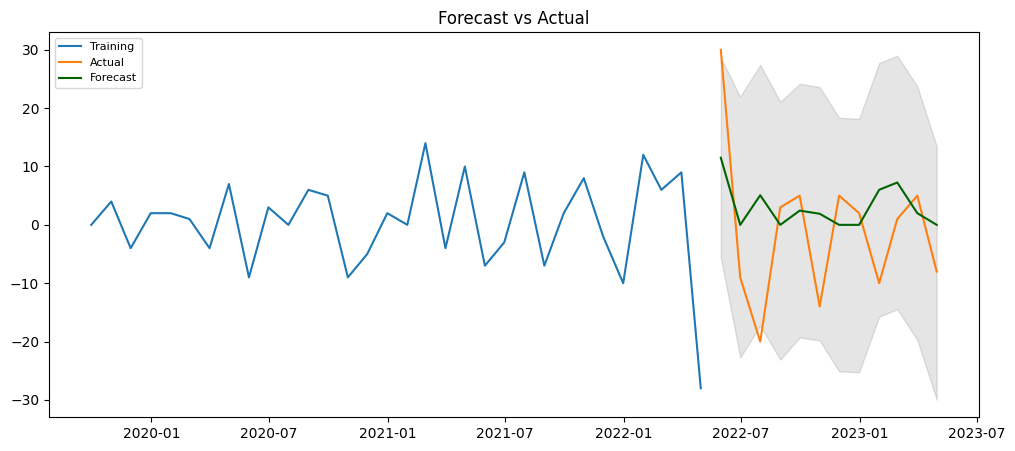


Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 31.300469
MAE: 25.854937


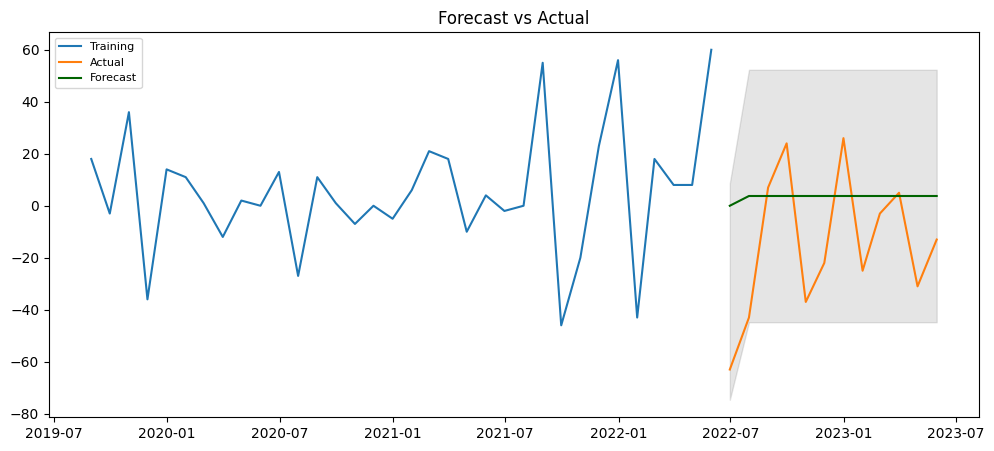


Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 46.644042
MAE: 36.500000


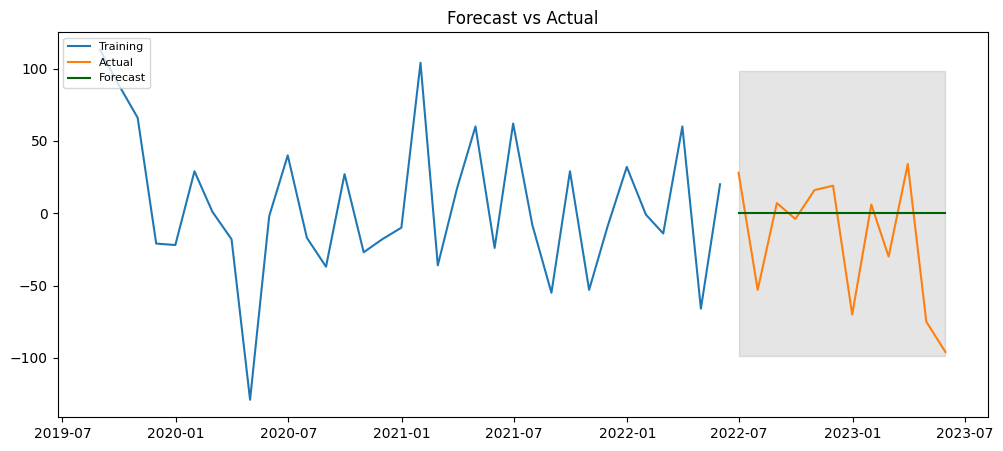


Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 43.016470
MAE: 33.083333


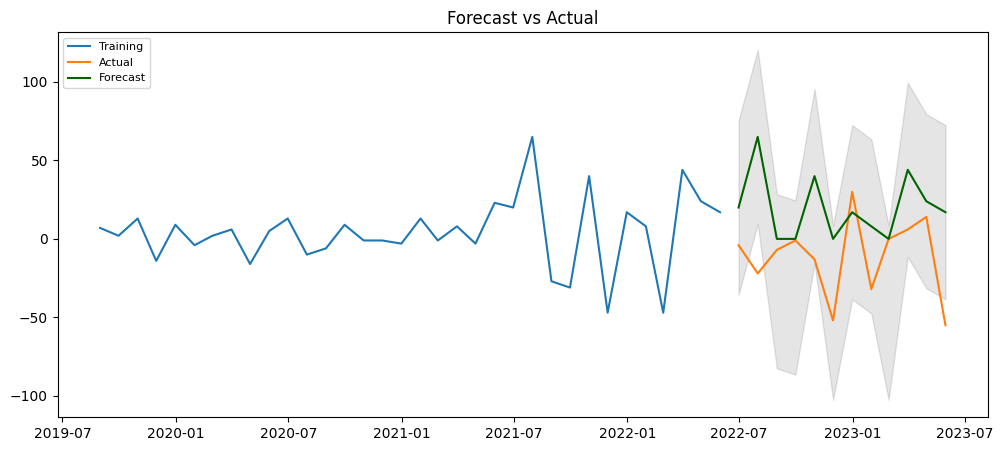


Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 25.845141
MAE: 21.475519


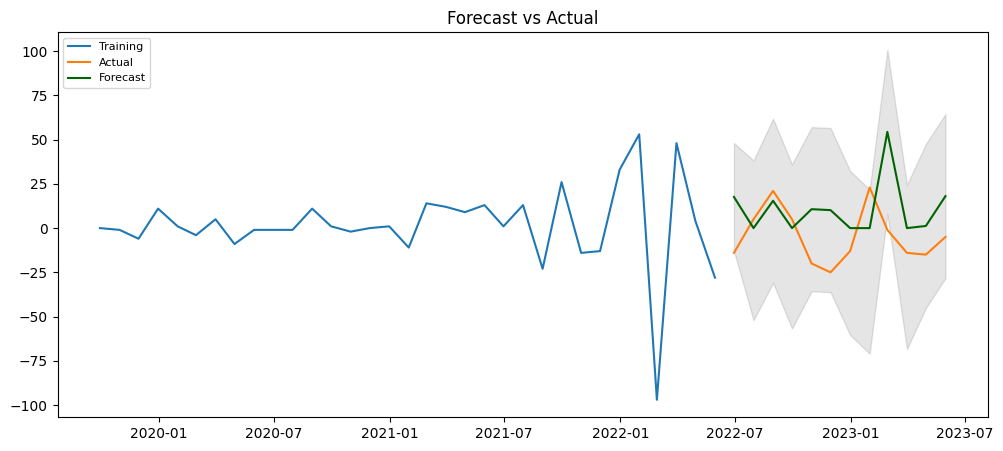

In [133]:
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    train, test, forecast, conf_int = sarimax_forecast_community_board(filtered_df, borough, cb)
    plot_forecast(train, test, forecast, conf_int)

Sarima with relevent coluums:

### Prophet

In [134]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
from prophet import Prophet

In [136]:
def prophet_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits
    df = cb_data.resample('M').size().reset_index()
    df.columns = ['ds', 'y']
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = df[:-12], df[-12:]
    
    # Create and fit Prophet model
    model = Prophet(yearly_seasonality=True)
    model.fit(train)
    
    # Create dataframe for future predictions
    future = model.make_future_dataframe(periods=len(test), freq='M')
    
    # Make predictions
    forecast_df = model.predict(future)
    
    # Calculate and print forecast metrics
    rmse, mae = calculate_forecast_metrics(test.y, forecast_df[-len(test):].yhat)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    
    # Return the necessary variables for plotting
    forecast = forecast_df.yhat[-len(test):]
    conf_int = forecast_df[['yhat_lower', 'yhat_upper']][-len(test):]
    
    # Clip negative values to 0
    forecast = np.clip(forecast, 0, None)
    
    return train.y, test.y, forecast, conf_int




In [137]:
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    prophet_forecast_community_board(filtered_df, borough, cb)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/imvj2q4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/626frwyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83567', 'data', 'file=/tmp/tmpa67j76pm/imvj2q4h.json', 'init=/tmp/tmpa67j76pm/626frwyf.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_modelg5ud697j/prophet_model-20230523183037.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Community board with the most growth in building permits in BRONX is: 204.0


18:30:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/iwqwxmub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/dvok_550.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41671', 'data', 'file=/tmp/tmpa67j76pm/iwqwxmub.json', 'init=/tmp/tmpa67j76pm/dvok_550.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_modelp7ldu4tx/prophet_model-20230523183037.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 20.762399
MAE: 18.687993

Community board with the most growth in building permits in BROOKLYN is: 301.0


18:30:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/px9psfsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/bzbt_mly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42439', 'data', 'file=/tmp/tmpa67j76pm/px9psfsa.json', 'init=/tmp/tmpa67j76pm/bzbt_mly.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_model6ehj1kf_/prophet_model-20230523183038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 91.666890
MAE: 72.697163

Community board with the most growth in building permits in MANHATTAN is: 105.0


18:30:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/6yiqj554.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/v8gept28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98401', 'data', 'file=/tmp/tmpa67j76pm/6yiqj554.json', 'init=/tmp/tmpa67j76pm/v8gept28.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_modelv6omm9iu/prophet_model-20230523183038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 102.642864
MAE: 74.746203

Community board with the most growth in building permits in QUEENS is: 407.0


18:30:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/j1ue6ky8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/rhvv_nws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6728', 'data', 'file=/tmp/tmpa67j76pm/j1ue6ky8.json', 'init=/tmp/tmpa67j76pm/rhvv_nws.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_model7c9urzd4/prophet_model-20230523183038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:38 - cmdstanpy - INFO - Chain [1] 

RMSE: 89.081137
MAE: 75.337059

Community board with the most growth in building permits in STATEN ISLAND is: 501.0


INFO:cmdstanpy:Chain [1] done processing


RMSE: 66.347258
MAE: 56.186088


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/gthyim3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/r1rtlhj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31313', 'data', 'file=/tmp/tmpa67j76pm/gthyim3k.json', 'init=/tmp/tmpa67j76pm/r1rtlhj4.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_model6fuv_4ns/prophet_model-20230523183038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediction results for community board with the most growth in BRONX is: 204.0


18:30:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 20.762399
MAE: 18.687993


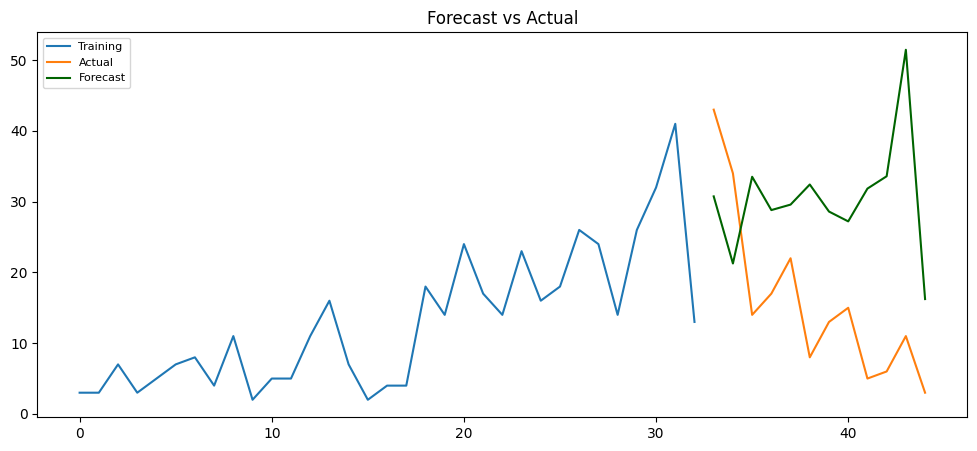

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/h_8s70yo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/bc3jka3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41102', 'data', 'file=/tmp/tmpa67j76pm/h_8s70yo.json', 'init=/tmp/tmpa67j76pm/bc3jka3g.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_modelmzq7c_jk/prophet_model-20230523183039.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediction results for community board with the most growth in BROOKLYN is: 301.0


18:30:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 91.666890
MAE: 72.697163


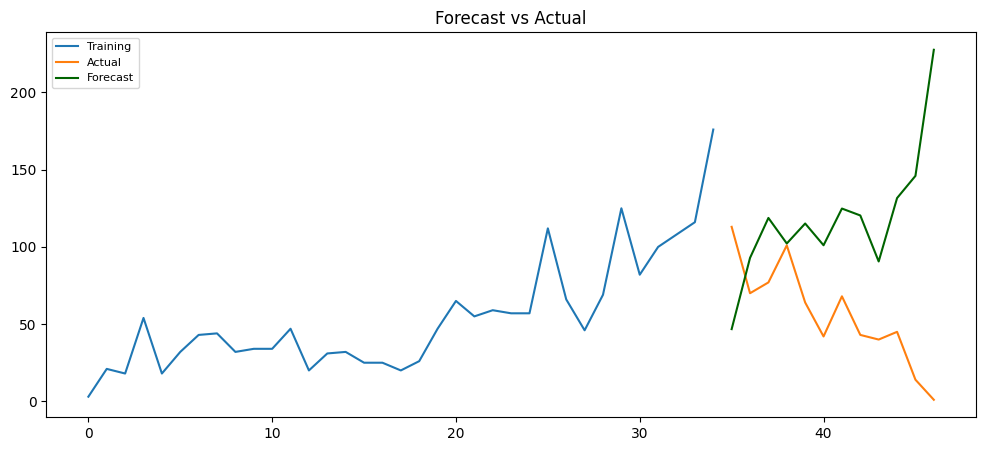

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/hnljfzzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/6zg_7liv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62633', 'data', 'file=/tmp/tmpa67j76pm/hnljfzzr.json', 'init=/tmp/tmpa67j76pm/6zg_7liv.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_modelpmzketg6/prophet_model-20230523183040.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediction results for community board with the most growth in MANHATTAN is: 105.0


18:30:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 102.642864
MAE: 74.746203


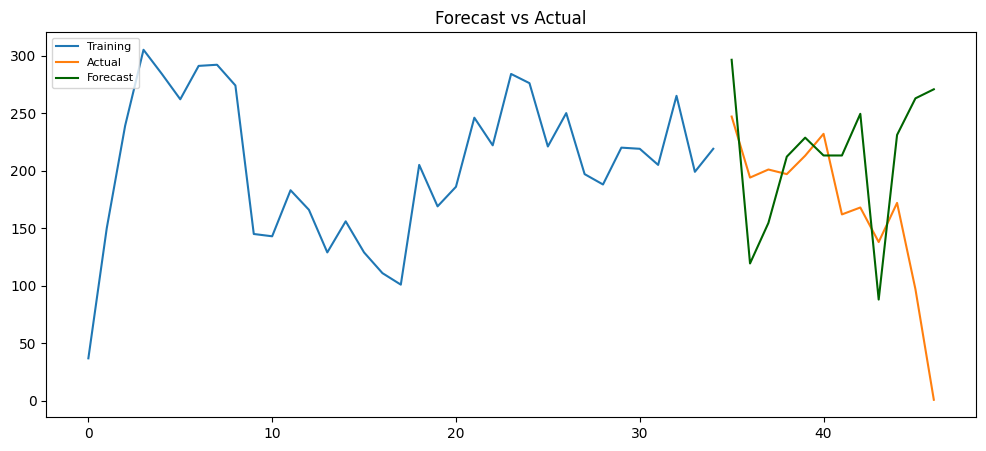

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/r_xs7ux4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/c516blrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19625', 'data', 'file=/tmp/tmpa67j76pm/r_xs7ux4.json', 'init=/tmp/tmpa67j76pm/c516blrj.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_model7tlw5nnv/prophet_model-20230523183040.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediction results for community board with the most growth in QUEENS is: 407.0


18:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 89.081137
MAE: 75.337059


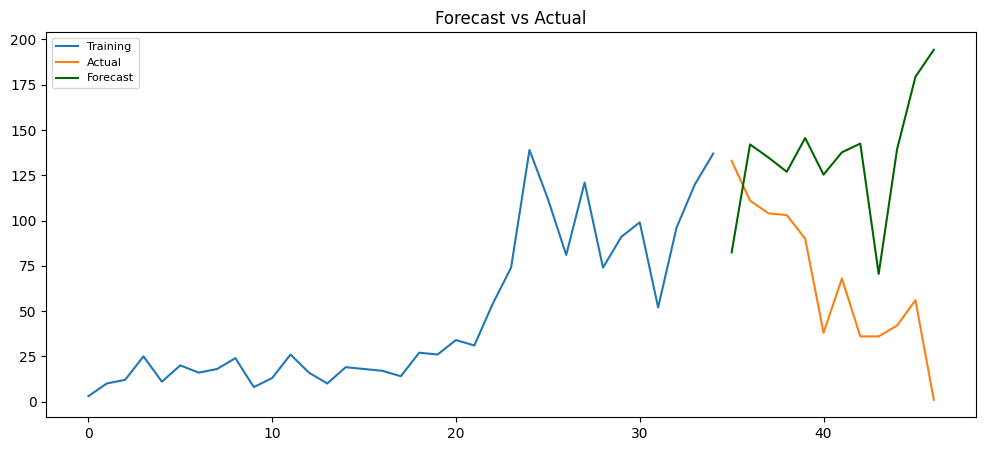

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/zx2zizhm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa67j76pm/e7eqtwrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93559', 'data', 'file=/tmp/tmpa67j76pm/zx2zizhm.json', 'init=/tmp/tmpa67j76pm/e7eqtwrd.json', 'output', 'file=/tmp/tmpa67j76pm/prophet_modellicjjtcp/prophet_model-20230523183041.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 66.347258
MAE: 56.186088


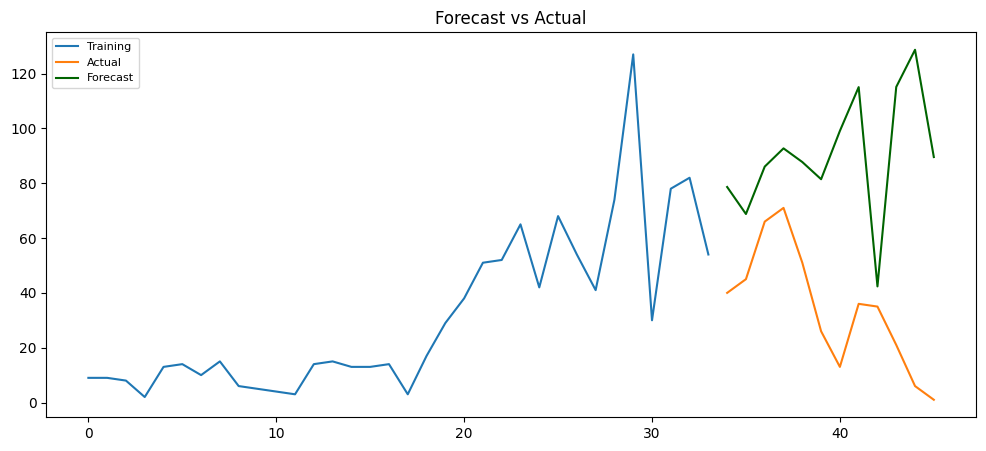

In [138]:
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    train, test, forecast, conf_int = prophet_forecast_community_board(filtered_df, borough, cb)
    plot_forecast(train, test, forecast, conf_int)


### LTSM

In [139]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
import numpy as np
from keras.layers import Activation

In [140]:
# Function to reshape dataset for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)



In [141]:

import tensorflow as tf

# Ensure reproducibility
np.random.seed(7)
tf.random.set_seed(7)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [142]:
def plot_forecast(train, test, forecast, rmse, mae):
    plt.figure(figsize=(10, 4))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast')
    plt.legend(loc='best')
    plt.title(f'Forecast vs Actuals. RMSE: {rmse:.2f}, MAE: {mae:.2f}')
    plt.grid(True)
    plt.show()


In [143]:
def lstm_forecast_community_board(filtered_df, borough, cb_no, look_back=1, differenced=True):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    if differenced:
        # Resample by month and count the permits, then difference the data
        data = cb_data.resample('M').size().diff().dropna()
    else:
        data = cb_data.resample('M').size()
    
    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(data.values.reshape(-1, 1))
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = dataset[:-12, :], dataset[-12:, :]
    
    # Reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # Reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(64, input_shape=(1, look_back)))  # Increase the number of units
    model.add(Dropout(0.2))  # Add dropout regularization
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # Clip negative values to 0
    trainPredict = np.clip(trainPredict, 0, None)
    testPredict = np.clip(testPredict, 0, None)
    
    # Calculate root mean squared error and mean absolute error
    rmse = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
    mae = mean_absolute_error(testY[0], testPredict[:, 0])
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    
    if differenced:
        return rmse, mae
    else:
        forecast_index = pd.date_range(start=data.index[-look_back-1], periods=len(testX)+1, freq='M')[1:]
        forecast_series = pd.Series(testPredict[:, 0], index=forecast_index)
        return data[:-12], data[-12:], forecast_series


In [144]:
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    rmse, mae = lstm_forecast_community_board(filtered_df, borough, cb, look_back=1, differenced=True)


Prediction results for community board with the most growth in BRONX is: 204.0
1/1 [==============================] - 0s 27ms/step
RMSE: 9.981751
MAE: 7.372970

Prediction results for community board with the most growth in BROOKLYN is: 301.0
1/1 [==============================] - 0s 348ms/step
RMSE: 31.463530
MAE: 26.230427

Prediction results for community board with the most growth in MANHATTAN is: 105.0
1/1 [==============================] - 0s 350ms/step


1/1 [==============================] - 0s 336ms/step
RMSE: 40.885724
MAE: 31.729834

Prediction results for community board with the most growth in QUEENS is: 407.0


1/1 [==============================] - 0s 370ms/step
RMSE: 24.964204
MAE: 19.619284

Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
1/1 [==============================] - 0s 22ms/step
RMSE: 21.028449
MAE: 17.774739



Prediction results for community board with the most growth in BRONX is: 204.0
1/1 [==============================] - 0s 17ms/step
RMSE: 8.990623
MAE: 6.886166


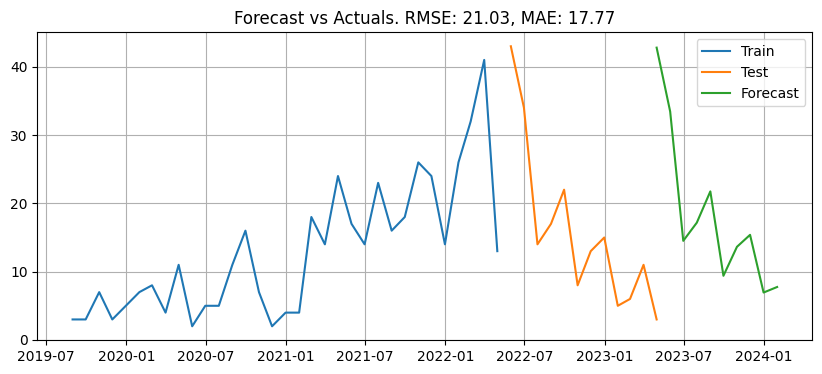


Prediction results for community board with the most growth in BROOKLYN is: 301.0
1/1 [==============================] - 0s 96ms/step
RMSE: 22.870150
MAE: 20.328371


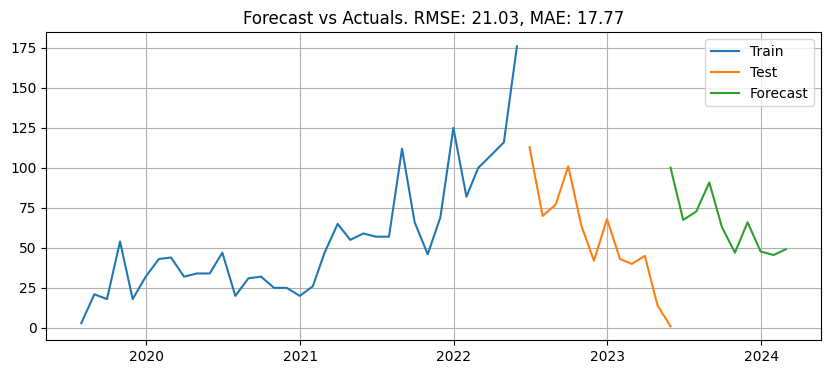


Prediction results for community board with the most growth in MANHATTAN is: 105.0
1/1 [==============================] - 0s 19ms/step
RMSE: 40.310890
MAE: 29.193877


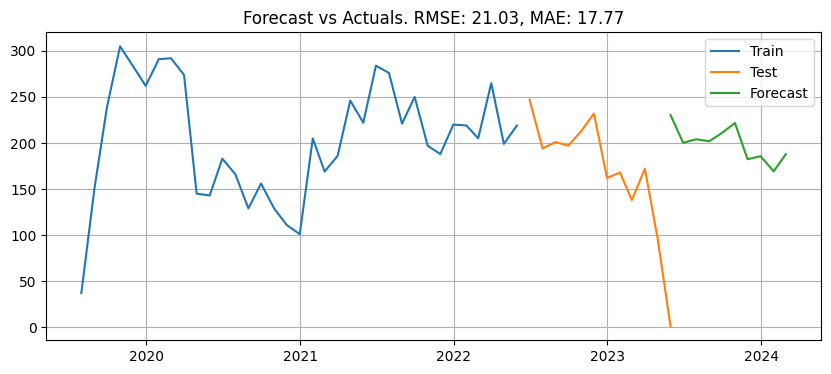


Prediction results for community board with the most growth in QUEENS is: 407.0
1/1 [==============================] - 0s 19ms/step
RMSE: 20.686649
MAE: 14.459042


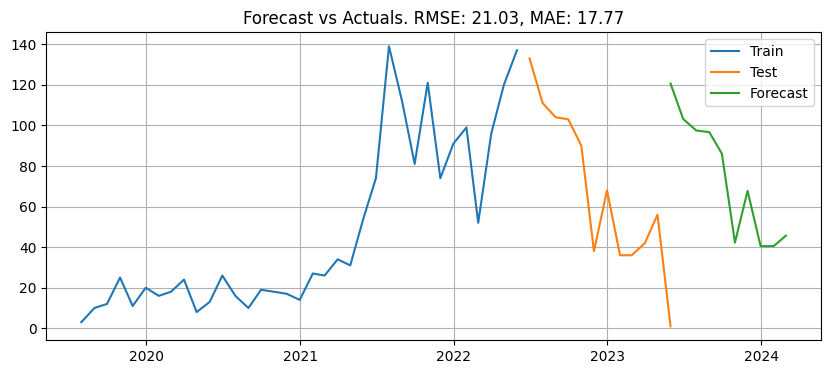


Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
1/1 [==============================] - 0s 337ms/step
RMSE: 15.473284
MAE: 13.945617


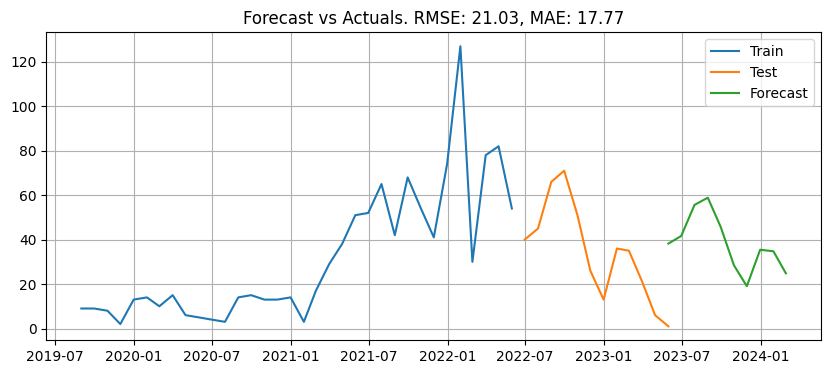

In [145]:
# or, for plotting purposes:
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    train, test, forecast = lstm_forecast_community_board(filtered_df, borough, cb, look_back=1, differenced=False)
    plot_forecast(train, test, forecast, rmse, mae)

# Model Comparison

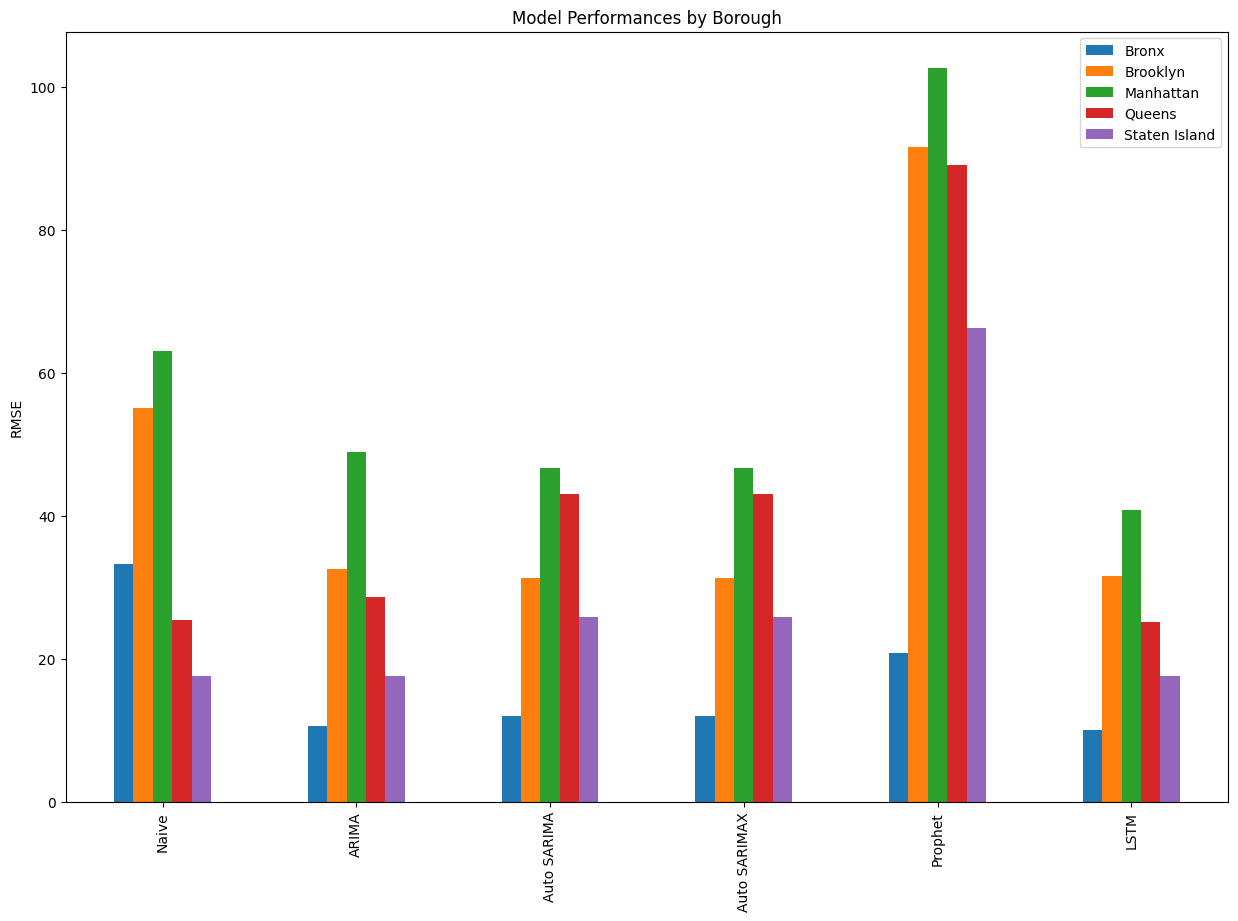

In [146]:
# Define the models and their performances
models = ['Naive', 'ARIMA', 'Auto SARIMA', 'Auto SARIMAX', 'Prophet', 'LSTM']

# Set up the data for each borough
bronx_data = {'Bronx': [33.203915, 10.596981, 11.964019, 11.964019, 20.762399, 10.034106]}
brooklyn_data = {'Brooklyn': [55.029538, 32.527121, 31.300469, 31.300469, 91.666890, 31.538724]}
manhattan_data = {'Manhattan': [63.063460, 48.974128, 46.644042, 46.644042, 102.642864, 40.858599]}
queens_data = {'Queens': [25.344296, 28.622559, 43.016470, 43.016470, 89.081137, 25.099369]}
staten_island_data = {'Staten Island': [17.618645, 17.511487, 25.845141, 25.845141, 66.347258, 17.511487]}

# Create the dataframes for each borough
bronx_df = pd.DataFrame(bronx_data, index=models)
brooklyn_df = pd.DataFrame(brooklyn_data, index=models)
manhattan_df = pd.DataFrame(manhattan_data, index=models)
queens_df = pd.DataFrame(queens_data, index=models)
staten_island_df = pd.DataFrame(staten_island_data, index=models)

# Combine the dataframes
combined_df = pd.concat([bronx_df, brooklyn_df, manhattan_df, queens_df, staten_island_df], axis=1)

# Plot the data
combined_df.plot(kind='bar', figsize=(15, 10))

plt.ylabel('RMSE')
plt.title('Model Performances by Borough')
plt.show()

In [147]:


# Define the models and their performances
models = ['Naive', 'ARIMA', 'Auto SARIMA', 'Auto SARIMAX', 'Prophet', 'LSTM']

# Set up the data for each borough
bronx_data = {'Bronx': [33.203915, 10.596981, 11.964019, 11.964019, 20.762399, 10.034106]}
brooklyn_data = {'Brooklyn': [55.029538, 32.527121, 31.300469, 31.300469, 91.666890, 31.538724]}
manhattan_data = {'Manhattan': [63.063460, 48.974128, 46.644042, 46.644042, 102.642864, 40.858599]}
queens_data = {'Queens': [25.344296, 28.622559, 43.016470, 43.016470, 89.081137, 25.099369]}
staten_island_data = {'Staten Island': [17.618645, 17.511487, 25.845141, 25.845141, 66.347258, 17.511487]}

# Create the dataframes for each borough
bronx_df = pd.DataFrame(bronx_data, index=models)
brooklyn_df = pd.DataFrame(brooklyn_data, index=models)
manhattan_df = pd.DataFrame(manhattan_data, index=models)
queens_df = pd.DataFrame(queens_data, index=models)
staten_island_df = pd.DataFrame(staten_island_data, index=models)

# Combine the dataframes
combined_df = pd.concat([bronx_df, brooklyn_df, manhattan_df, queens_df, staten_island_df], axis=1)

# Calculate the average RMSE for each model
average_rmse = combined_df.mean(axis=1)

# Sort the models based on average RMSE (ascending order)
sorted_models = average_rmse.sort_values(ascending=True)

# Print the models from best to worst based on average performance
print("Models ranked from best to worst based on average performance (RMSE):")
for model in sorted_models.index:
    print(f"{model}: {average_rmse.loc[model]:.2f}")




Models ranked from best to worst based on average performance (RMSE):
LSTM: 25.01
ARIMA: 27.65
Auto SARIMA: 31.75
Auto SARIMAX: 31.75
Naive: 38.85
Prophet: 74.10


The LSTM model performed the best with the lowest average RMSE of 25.01. It outperformed the other models, including ARIMA, Auto SARIMA, Auto SARIMAX, Naive, and Prophet.

Therefore, based on the average performance, the LSTM model is recommended for building permit forecasting. It consistently achieved lower RMSE values across different boroughs, indicating better accuracy in predicting building permit trends.






# Conclusion: 
Based on our analysis of building permit growth and market trends, as well as our LSTM forecasting model, we recommend focusing on prime opportunities within the top-performing community boards in each NYC borough. These areas have shown strong growth potential and are projected to continue performing well in the future. By leveraging our data-driven approach and combining renovation opportunities with new construction projects, we can maximize returns and stay ahead of the market. Let us guide you towards the most thriving and attractive city neighborhoods, where old-world charm meets the promise of new development, ensuring success in your real estate investments.